In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [4]:
import coronagraph as cg
from jakely.plot import ColorTable

In [5]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [6]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# Updates to the DRM:
1. New input catalog from Chirs
2. Unique exo-Zodi distribution for each system from Chris, now accounted for
3. Coronagraph contrast and throughput now depend on the type of coronagraph and the planet-star angular separation in $\lambda/D$ 
4. Now using 20% bandpasses in the UV and visible and 10% in the NIR

In [7]:
drmA_APLC1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC1)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC1.generate_exptime_table()

No exact match found
Using F5V for F3/F5V


/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1017: RuntimeWarning: invalid value encountered in greater
  i = (cp > 0.)
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1018: RuntimeWarning: invalid value encountered in less_equal
  j = (cp <= 0.0)


No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


In [8]:
print(drmA_APLC1.cn.star)
print(drmA_APLC1.cn.planet)

Star: 
-----
- Effective Temperature (K) : 4900.0
- Radius (Solar Radii) : 1.05
Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 14.6768
- Number of exzodis (zodis) : 4.59673
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 0.7576617601771974
- Phase angle (deg) : 90.0
- Lambertian phase function : 0.3183098861837907
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0


/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


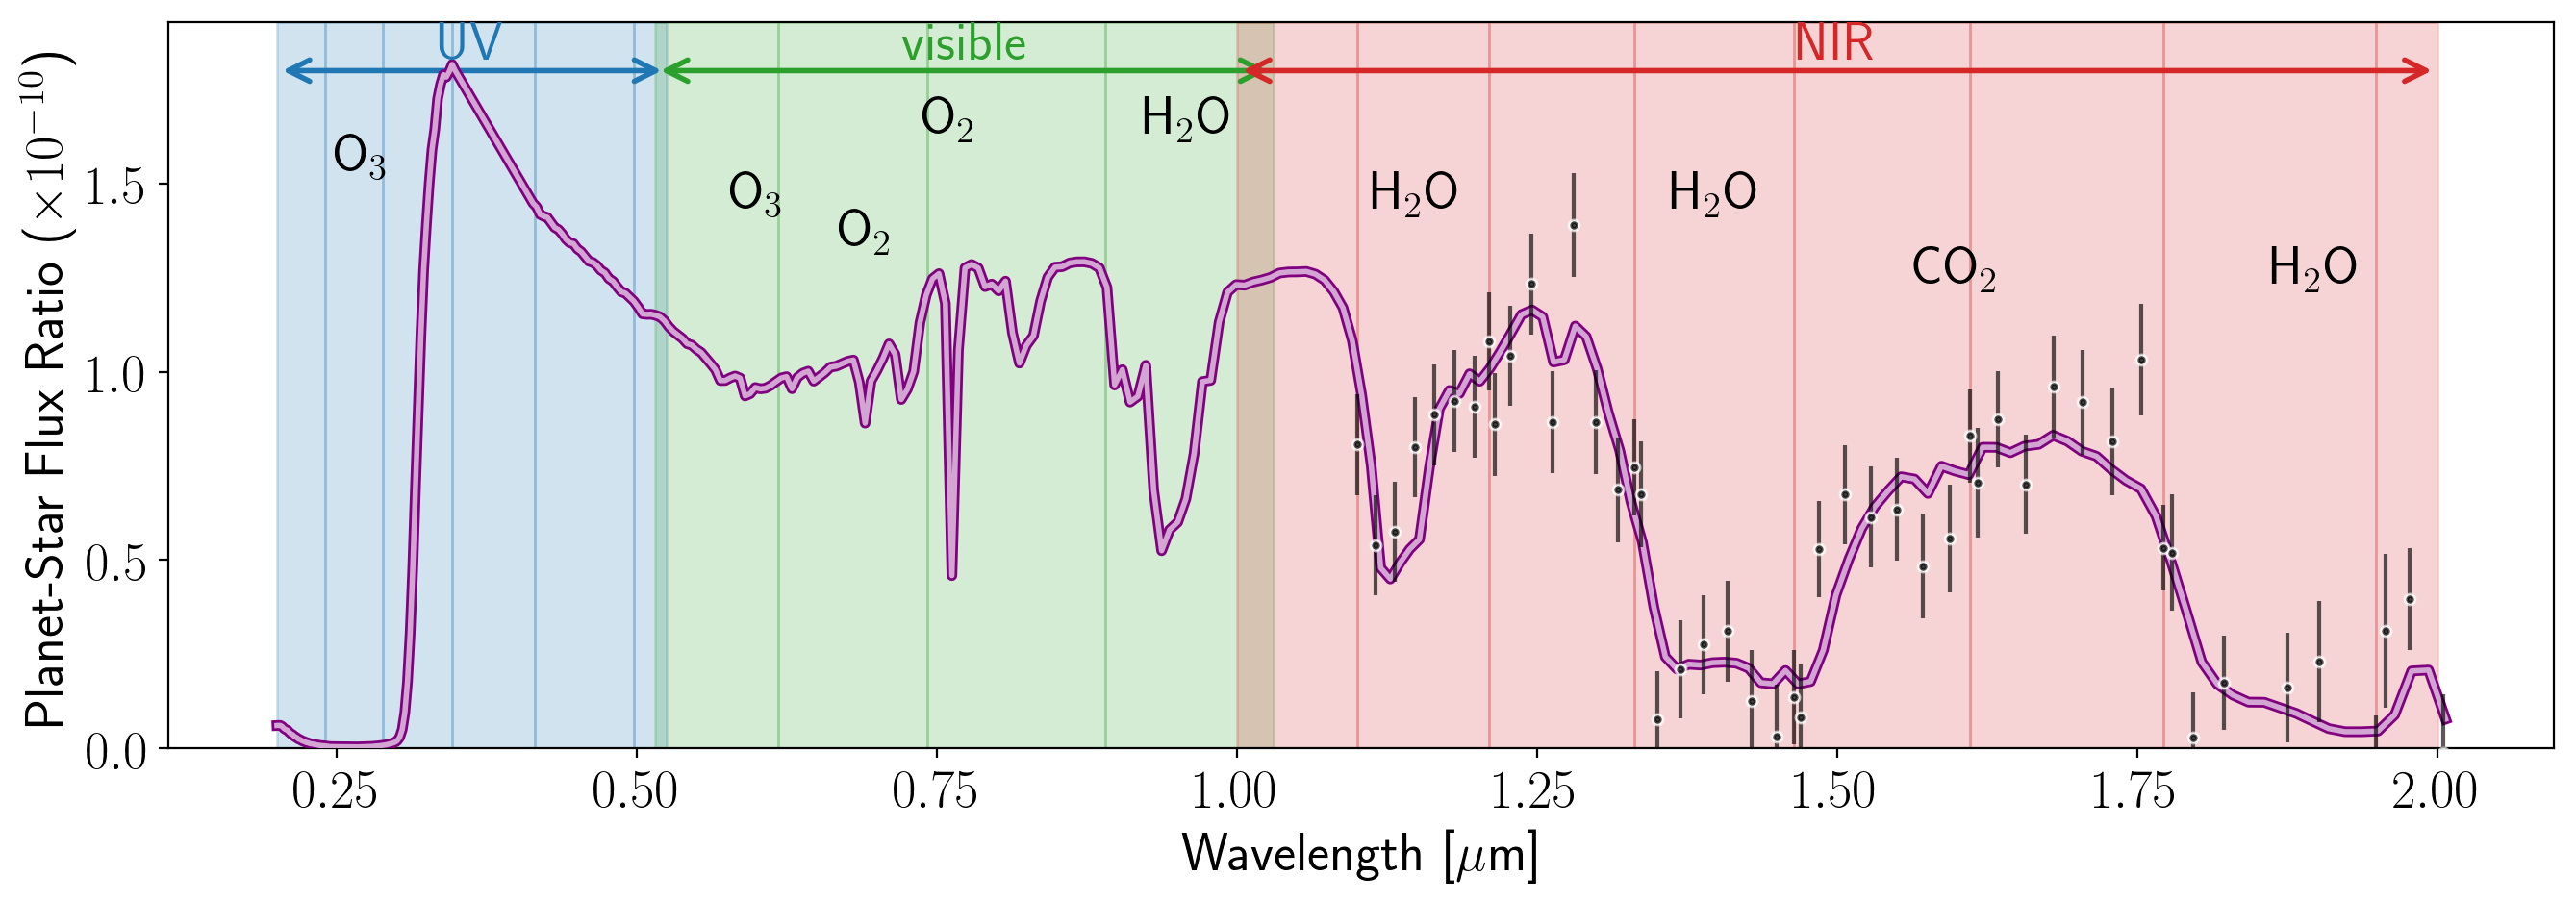

In [9]:
fig, ax = drmA_APLC1.plot_observed_spectrum()

In [10]:
drmA_APLC2 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC2)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC2.generate_exptime_table()

No exact match found
Using F5V for F3/F5V
No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


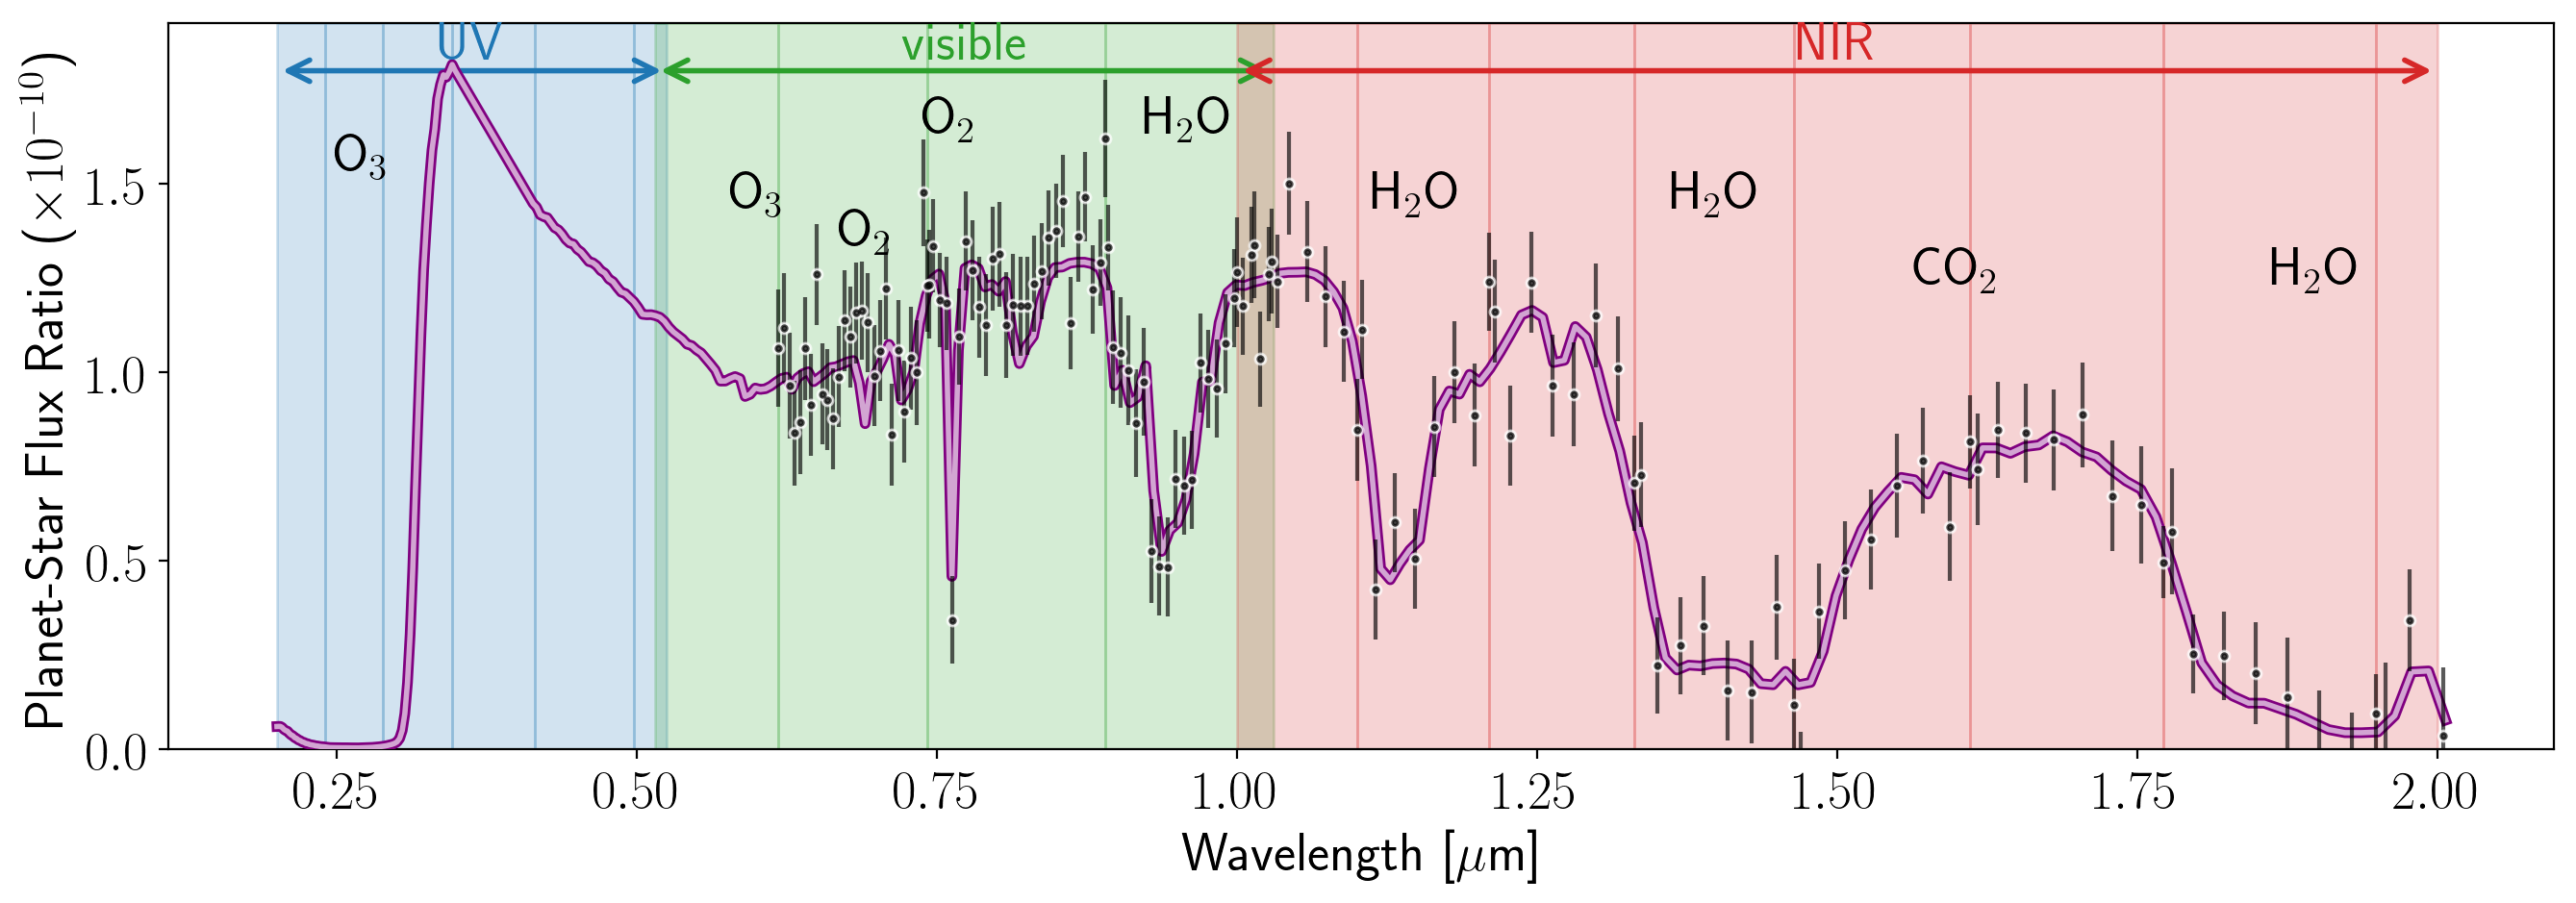

In [11]:
fig, ax = drmA_APLC2.plot_observed_spectrum()

In [12]:
drmA_APLC3 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC3)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC3.generate_exptime_table()

No exact match found
Using F5V for F3/F5V
No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


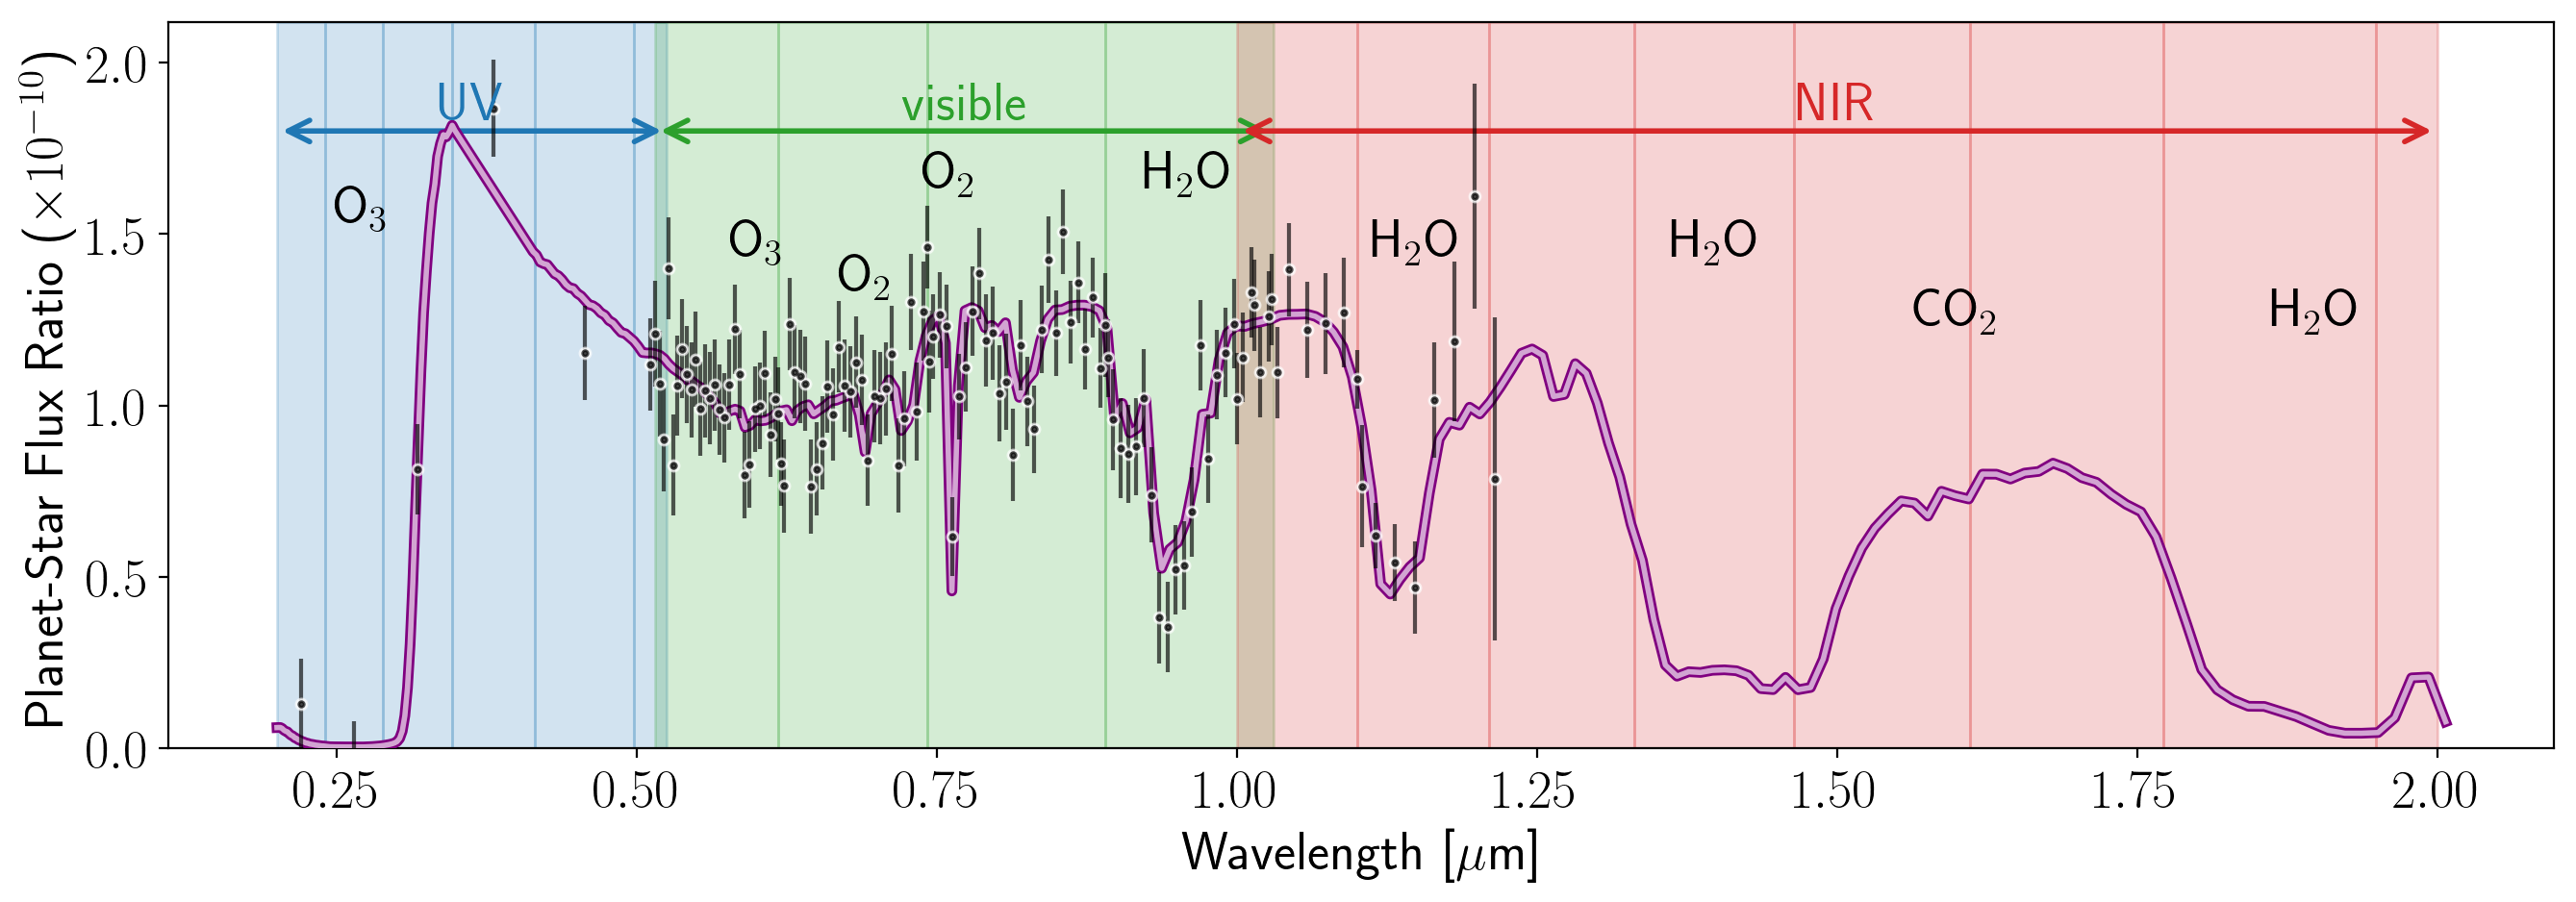

In [13]:
fig, ax = drmA_APLC3.plot_observed_spectrum()

# Determine the optimal coronagraph masks to use for each bandpass and for each star

In [14]:
# Combine into exposure time grid into 3d array
tpbpcs3d = np.array([drmA_APLC1.tpbpcs_rect, drmA_APLC2.tpbpcs_rect, drmA_APLC3.tpbpcs_rect])

# Convert nans to infs before minimizing
tpbpcs3d[np.isnan(tpbpcs3d)] = np.inf

# Find the mask with the lowest exposure time for each bp and for each star 
best_masks = np.argmin(tpbpcs3d, axis=0)     # These are the mask indicies
tpbpcs_rect_new = np.min(tpbpcs3d, axis=0)   # These are the exposure times for using the optimal masks

# Convert the infs back to nans for consistency
tpbpcs_rect_new[np.isinf(tpbpcs_rect_new)] = np.nan

# Completeness by target
tot_completeness = np.sum(np.isfinite(tpbpcs_rect_new) * drmA_APLC1.bp_frac, axis=1)

# Fraction of stars in biased sample that can completely observe each bandpass
frac_bias_bp = np.sum(np.isfinite(tpbpcs_rect_new)*1.0, axis=0) / drmA_APLC1.NBIAS

In [15]:
np.mean(tot_completeness)

0.8008589102800296

In [16]:
np.mean(drmA_APLC1.tot_completeness), np.mean(drmA_APLC2.tot_completeness), np.mean(drmA_APLC3.tot_completeness)

(0.540854736551216, 0.43830013172439214, 0.31693599852616067)

In [17]:
drmA_APLCx = copy.deepcopy(drmA_APLC1)
drmA_APLCx.tpbpcs_rect = tpbpcs_rect_new
drmA_APLCx.tot_completeness = tot_completeness
drmA_APLCx.frac_bias_bp = frac_bias_bp
drmA_APLCx._make_pandas_table()

In [18]:
drmA_APLCx.exptime_table

,HIP,type,d [pc],UV 1,UV 2,UV 3,UV 4,UV 5,UV 6,vis 1,...,vis 4,NIR 1,NIR 2,NIR 3,NIR 4,NIR 5,NIR 6,NIR 7,NIR 8,Spec. Completeness
0,70890,M5Ve,1.30124,40678160.115125135,23955.273744242342,82.54164036064697,3.528495254309386,0.27640263665175974,0.2539229206886032,0.9707813430046386,...,0.1261775338525839,0.05584602568768443,0.04769788110379477,0.06601917467919617,0.19118118699027165,nan,nan,nan,nan,0.7087500000000002
1,24186,M0V,3.9335,351232.0898787737,1383.6836251977254,29.5729521258775,4.197771055110862,0.655219573141469,0.856492292117966,4.5044223195427,...,1.6185224918285017,1.3254485546948171,1.2370055148935075,1.2259526816120152,1.360467031357381,1.6200962906046525,2.438473016838119,6.83965465296289,28.25357953894664,1.0
2,12114,K3V,7.23545,9133.587654878773,163.598184155296,12.915912589350492,3.5085496155246627,0.8524120199592135,1.3009017836604413,8.366909088172452,...,5.2711661906150145,10.091371926234295,9.658584657630541,10.38799486131202,14.622014805398102,31.645437598368705,136.5605222049042,nan,nan,0.8758483695652175
3,63721,F3V,4.61638,nan,nan,nan,nan,nan,nan,9.360070127843207,...,10.581554739552704,6.094952032001927,6.0001467276188505,6.492880336725317,7.75865906954297,9.705978543809799,12.56405321314586,22.84338723967769,67.28995286529728,0.8233695652173914
4,91772,K5,3.5228300000000004,2435.87788631114,62.9481641769512,8.852740573968731,3.2709486917370256,0.9665370944445333,1.6580691710722748,10.174047689827166,...,10.803377782716195,5.052469613595524,5.196937130822642,5.7845233306165165,6.963305710557457,8.859910517129759,13.50064753571957,18.550565797376578,25.391725537712407,1.0
5,76074,M0,5.9169,1791234.7837786553,6625.087484100632,105.37999525639613,11.169322682235984,1.4435267092472082,1.7717753711290904,10.458322061690591,...,3.385635176906071,5.262743563443047,6.522197454581234,16.22198015917077,146.84782949418644,nan,nan,nan,nan,0.7087500000000002
6,1599,F9V,8.53476,180.12375653898548,27.348891084126592,7.592683555950403,3.966546071109224,1.3520446794235539,2.6009156533549618,17.778520024562127,...,17.34158489942183,21.1783211170357,21.371065262858203,25.09987457859408,32.24321766844458,45.524169155217606,69.85000425807046,205.19969811111474,637.4415066570434,1.0
7,61317,G0V,8.61105,220.57705457855093,29.746148547906248,7.904666809432248,3.939779715002896,1.3905552014238962,2.6654052272641313,18.102235608525287,...,20.489387961698345,22.076462509730693,23.25251239885086,26.73260317361776,35.927534019631295,50.63330646662493,105.76671096222606,207.91463592513895,633.9326977233374,1.0
8,56997,G8Vvar,9.579419999999999,2212.719746808251,89.75901970289407,12.620023206953244,4.932802330496491,1.467595744591698,2.6435458998765538,19.20592012395927,...,22.13650945449836,37.69417942831605,38.3978345328339,44.1568254658006,60.52991493407942,117.06784893792081,412.11068901322056,3924.826545323943,nan,0.9721288586956522
9,64394,G0V,9.18315,266.70816177922677,34.70674602812636,9.150337429000189,4.535990718949827,1.6260113922621313,3.0172220800124383,21.02744979686427,...,24.4822762784406,28.796420777706214,29.38672400020732,34.99001322310888,48.21690512222063,89.77384848309444,136.61446471952956,273.77851314484883,833.9818230314892,1.0


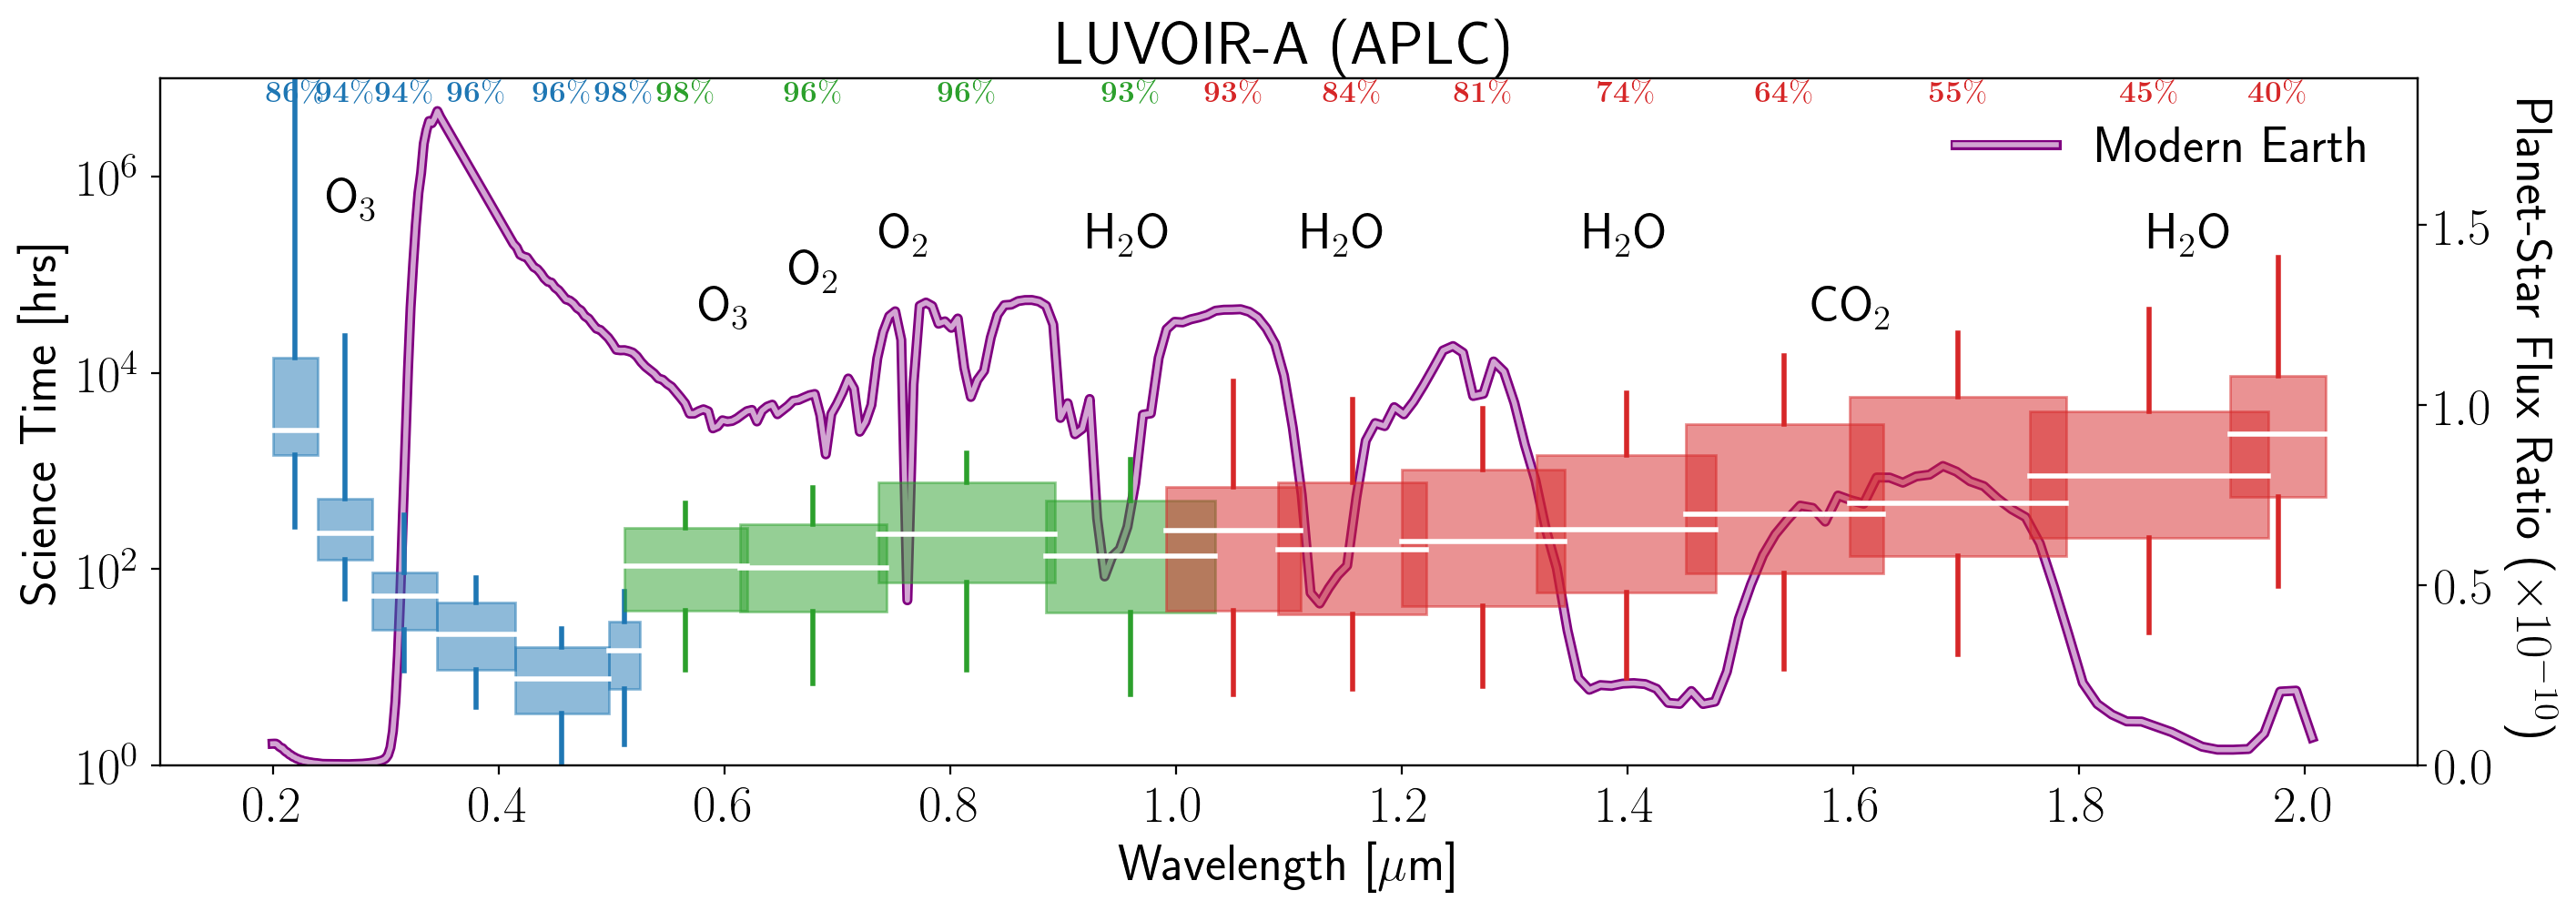

In [19]:
fig = drmA_APLCx.plot_bp_exptimes(plot_spectrum=True, title = "LUVOIR-A (APLC)")

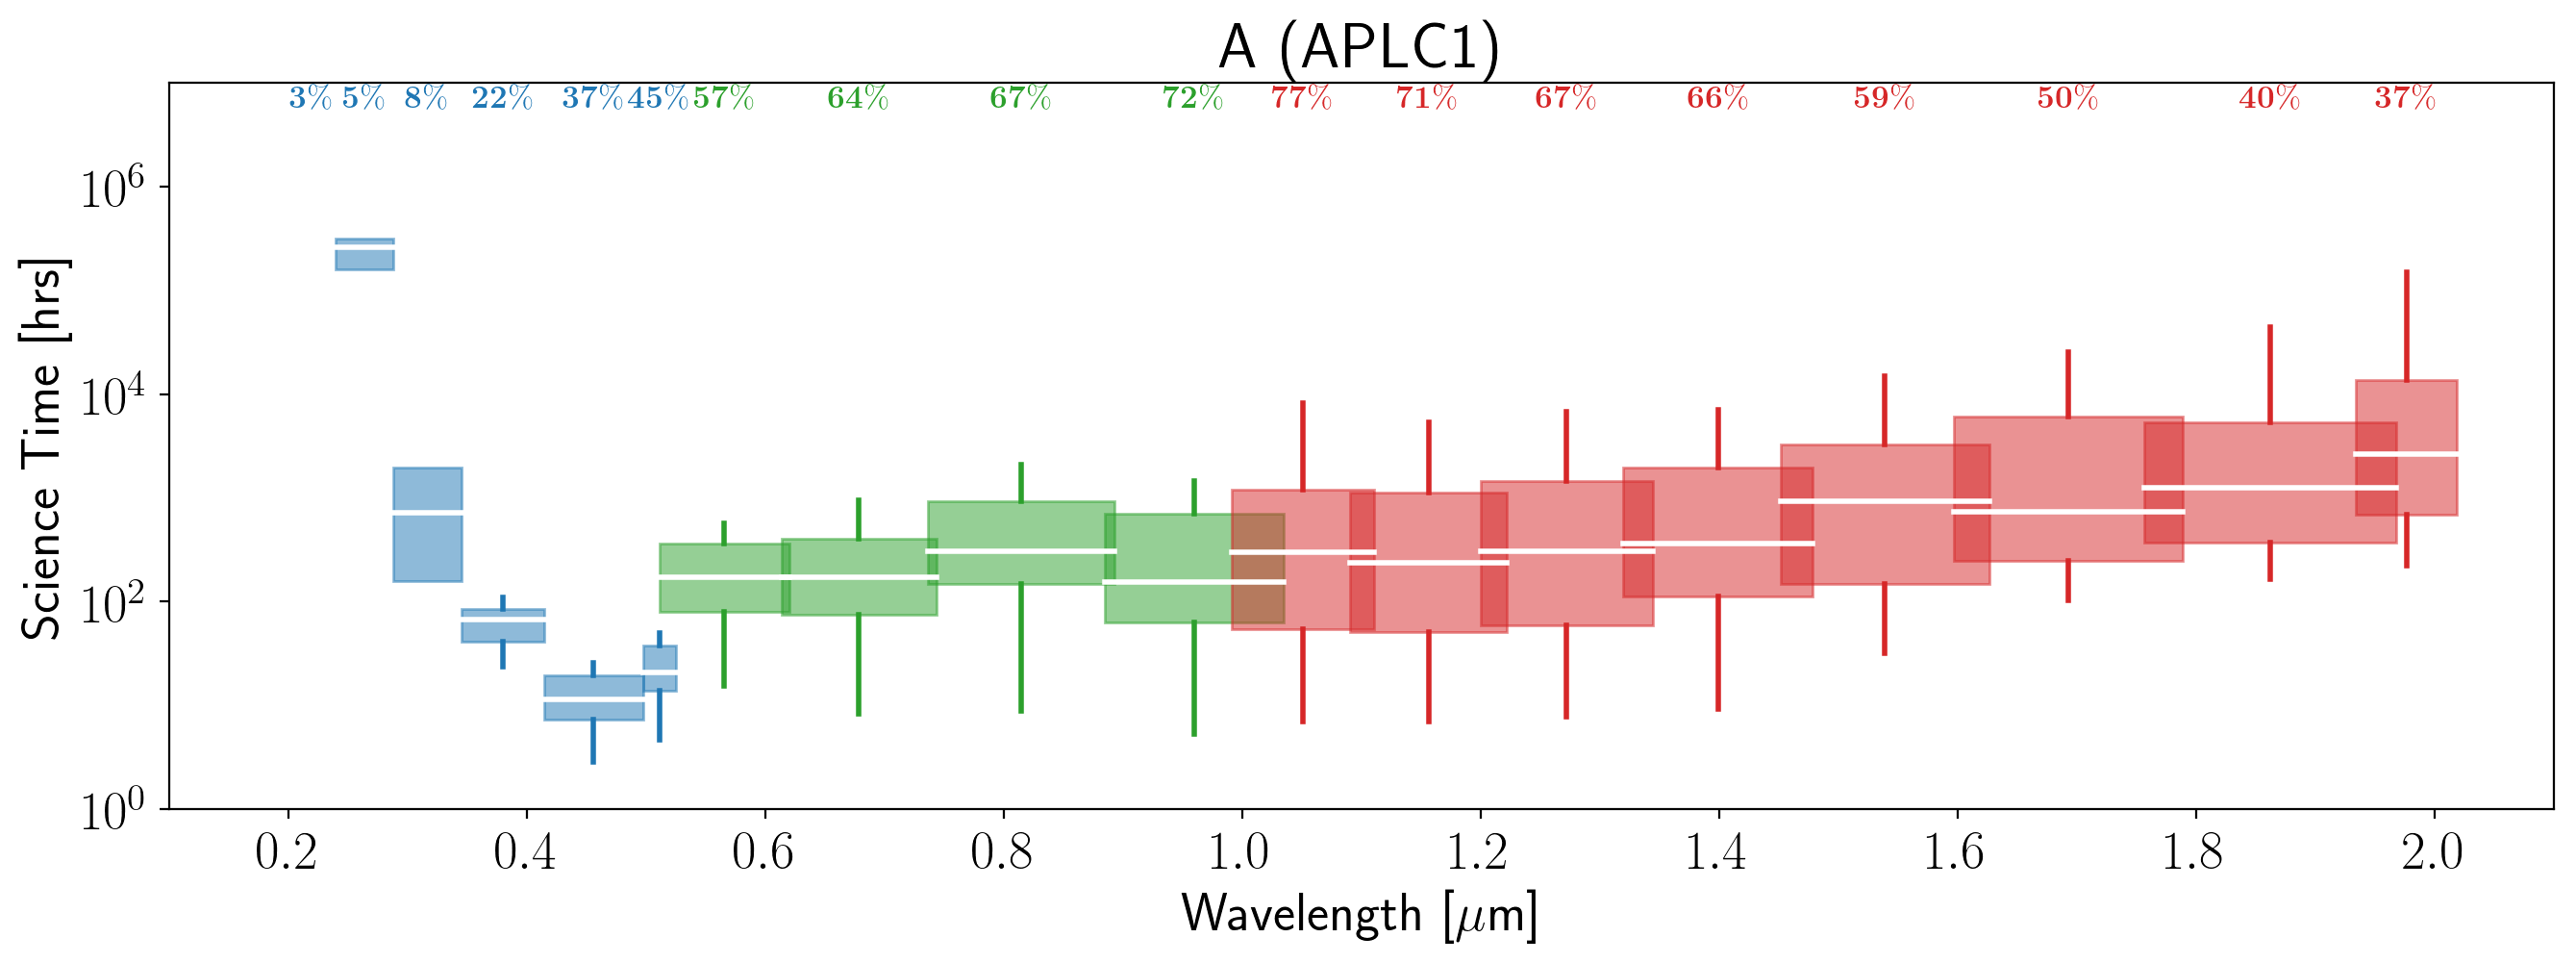

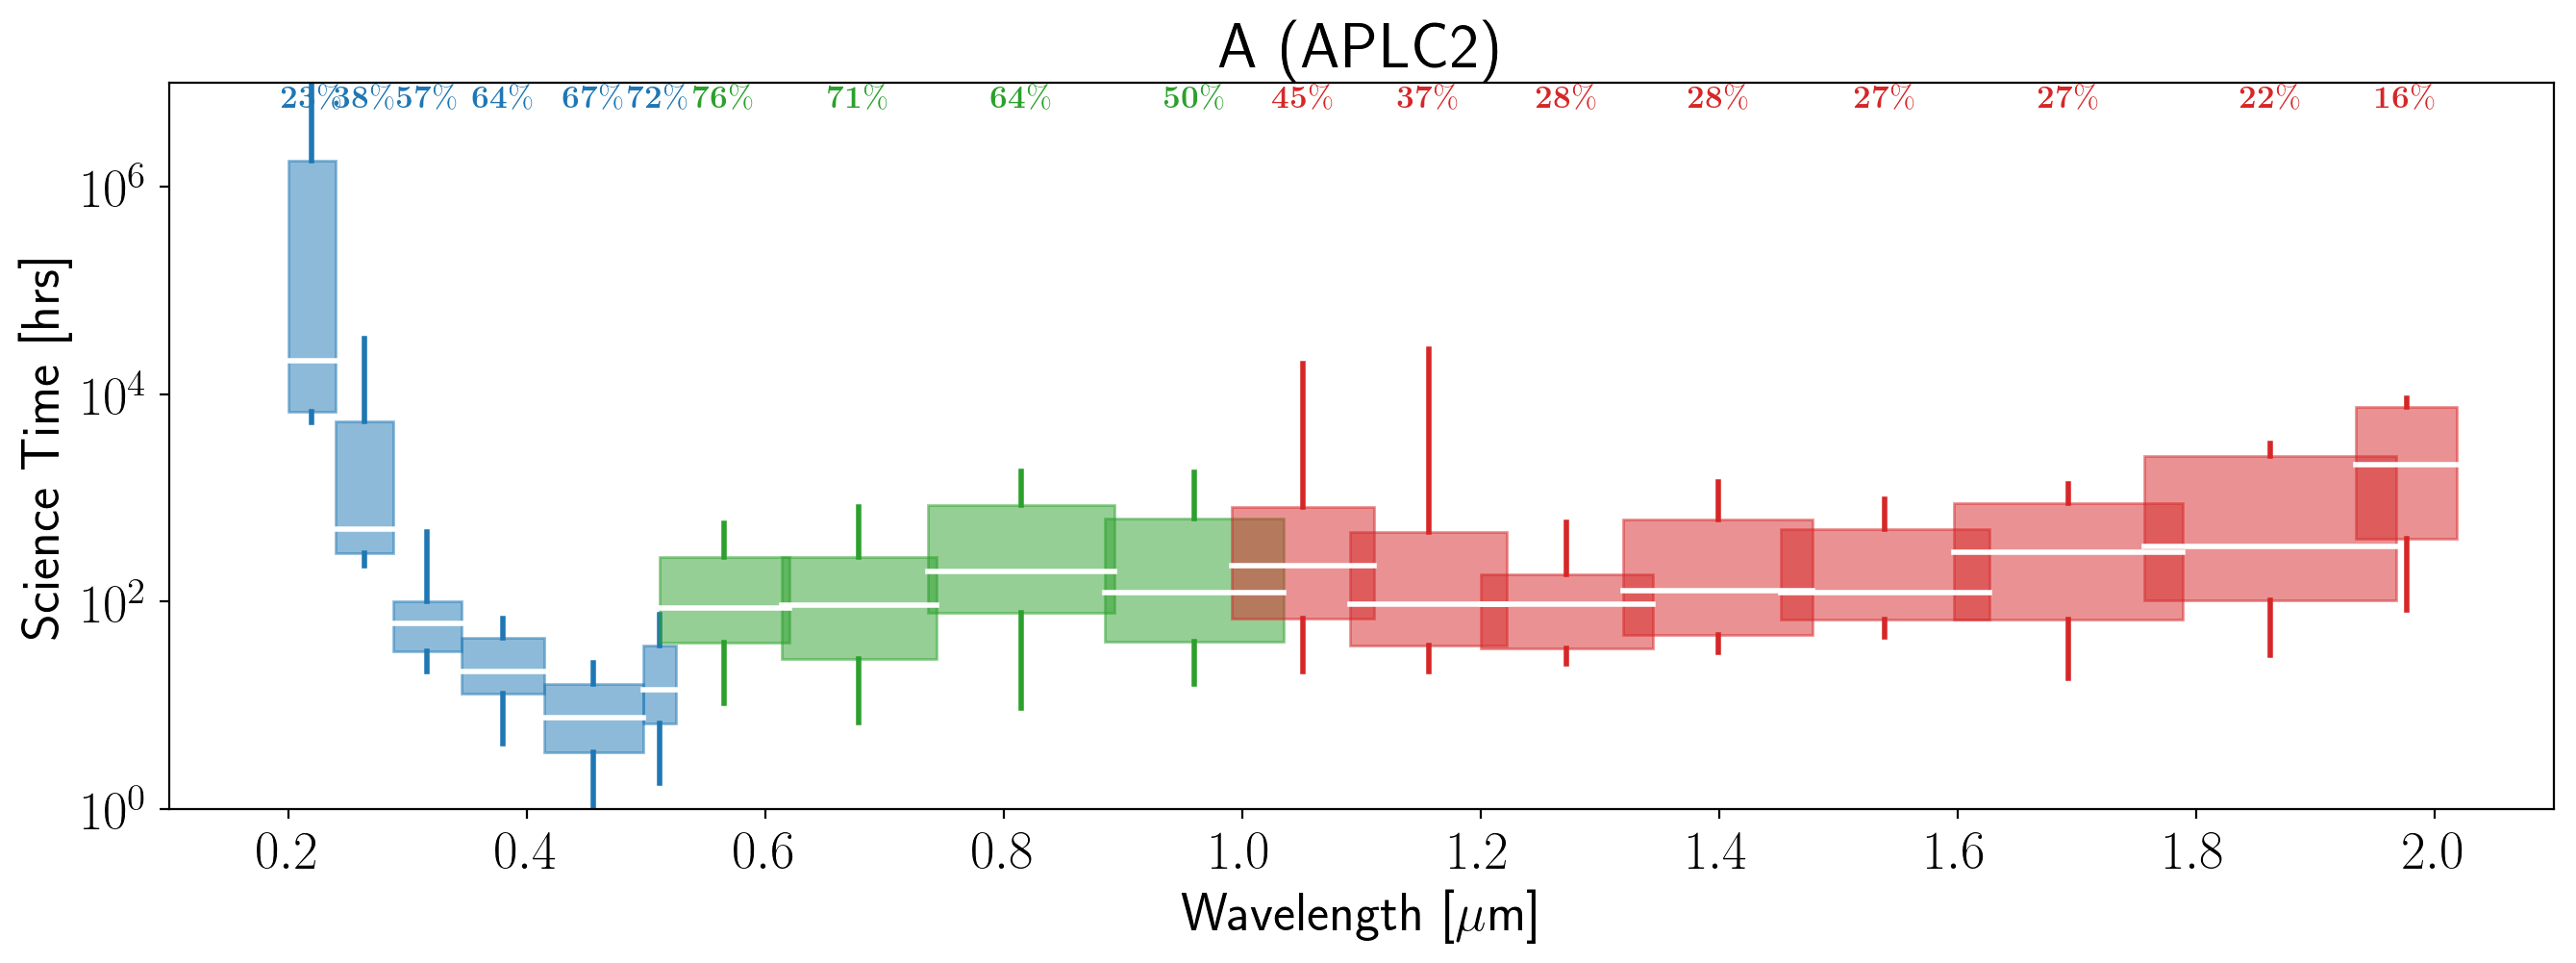

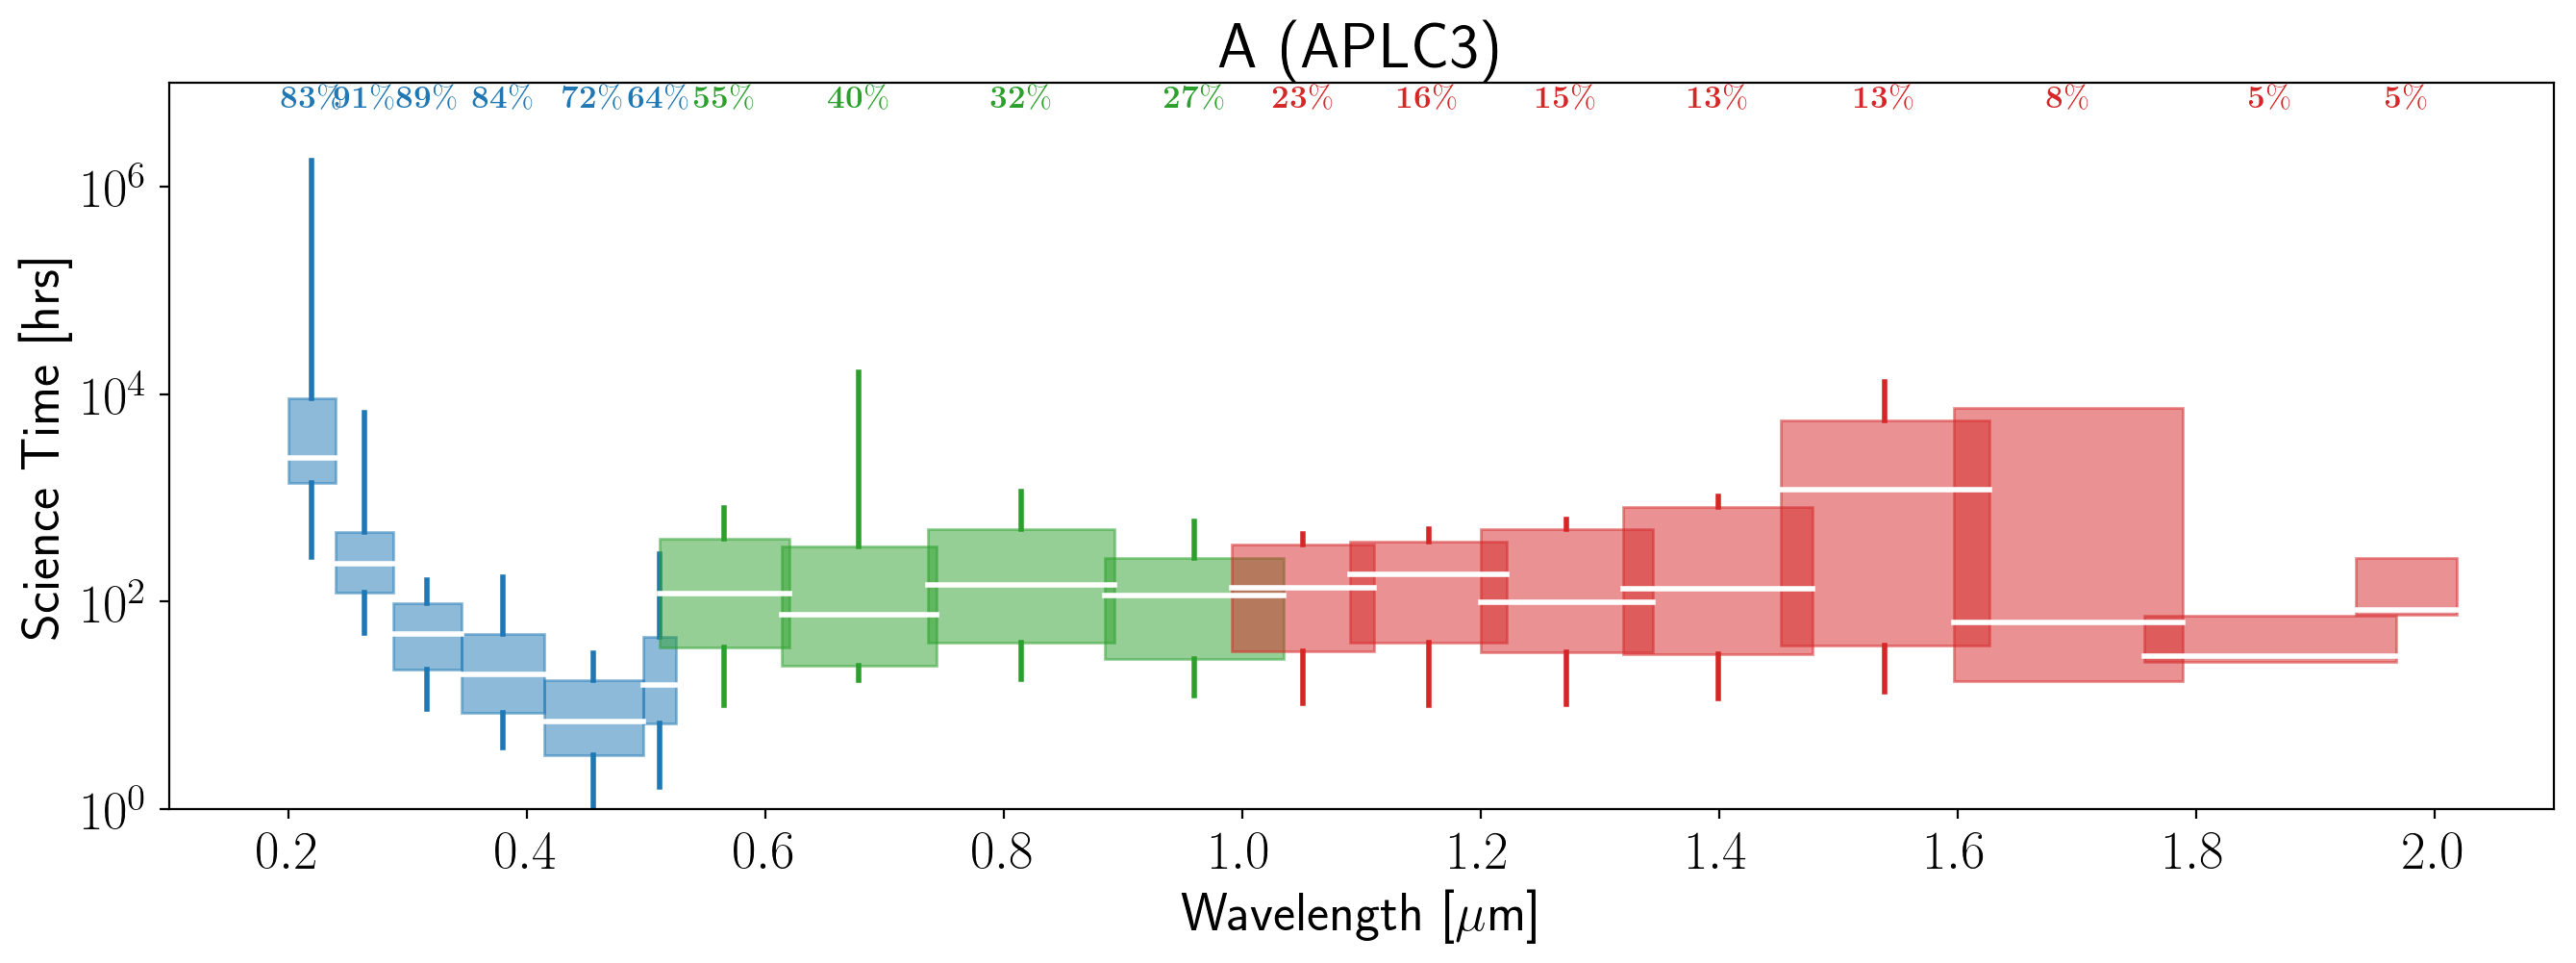

In [20]:
fig1 = drmA_APLC1.plot_bp_exptimes(plot_spectrum=False, title = drmA_APLC1.architecture)
fig2 = drmA_APLC2.plot_bp_exptimes(plot_spectrum=False, title = drmA_APLC2.architecture)
fig3 = drmA_APLC3.plot_bp_exptimes(plot_spectrum=False, title = drmA_APLC3.architecture)

# Run DRM

In [22]:
# Set generic DRM object name
drmx = drmA_APLCx

In [23]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-1 UV", 
    "-1 UV; -1 NIR", 
    "-1 UV; -2 NIR", 
    "-2 UV; -4 NIR",
    "-2 UV; No NIR",
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    spectroscopy.get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=1), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=2), 
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=4),
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=8),
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Indices of bandpasses to use for each test case
iuse_bps = np.array([np.delete(np.arange(len(drmx.bandpasses)), cases[icase]) for icase in range(len(cases))])

# Complete wavelength ranges for each case
case_ranges = np.array([[drmx.bandpasses[ind].min(), drmx.bandpasses[ind].max()] for ind in iuse_bps])
case_range_strings = ["%.2f - %.2f $\mu$m" %(case_ranges[i,0], case_ranges[i,1]) for i in range(len(case_ranges))]
case_name_strings = [case_names[i]+"\n(%s)" %case_range_strings[i] for i in range(len(cases))]

# Wavelength range completeness (assuming the first case is the full range "all")
case_completeness = (case_ranges[:,1] - case_ranges[:,0]) / (case_ranges[0,1] - case_ranges[0,0])

Text(0,1,'Total Exposure Time (days)')

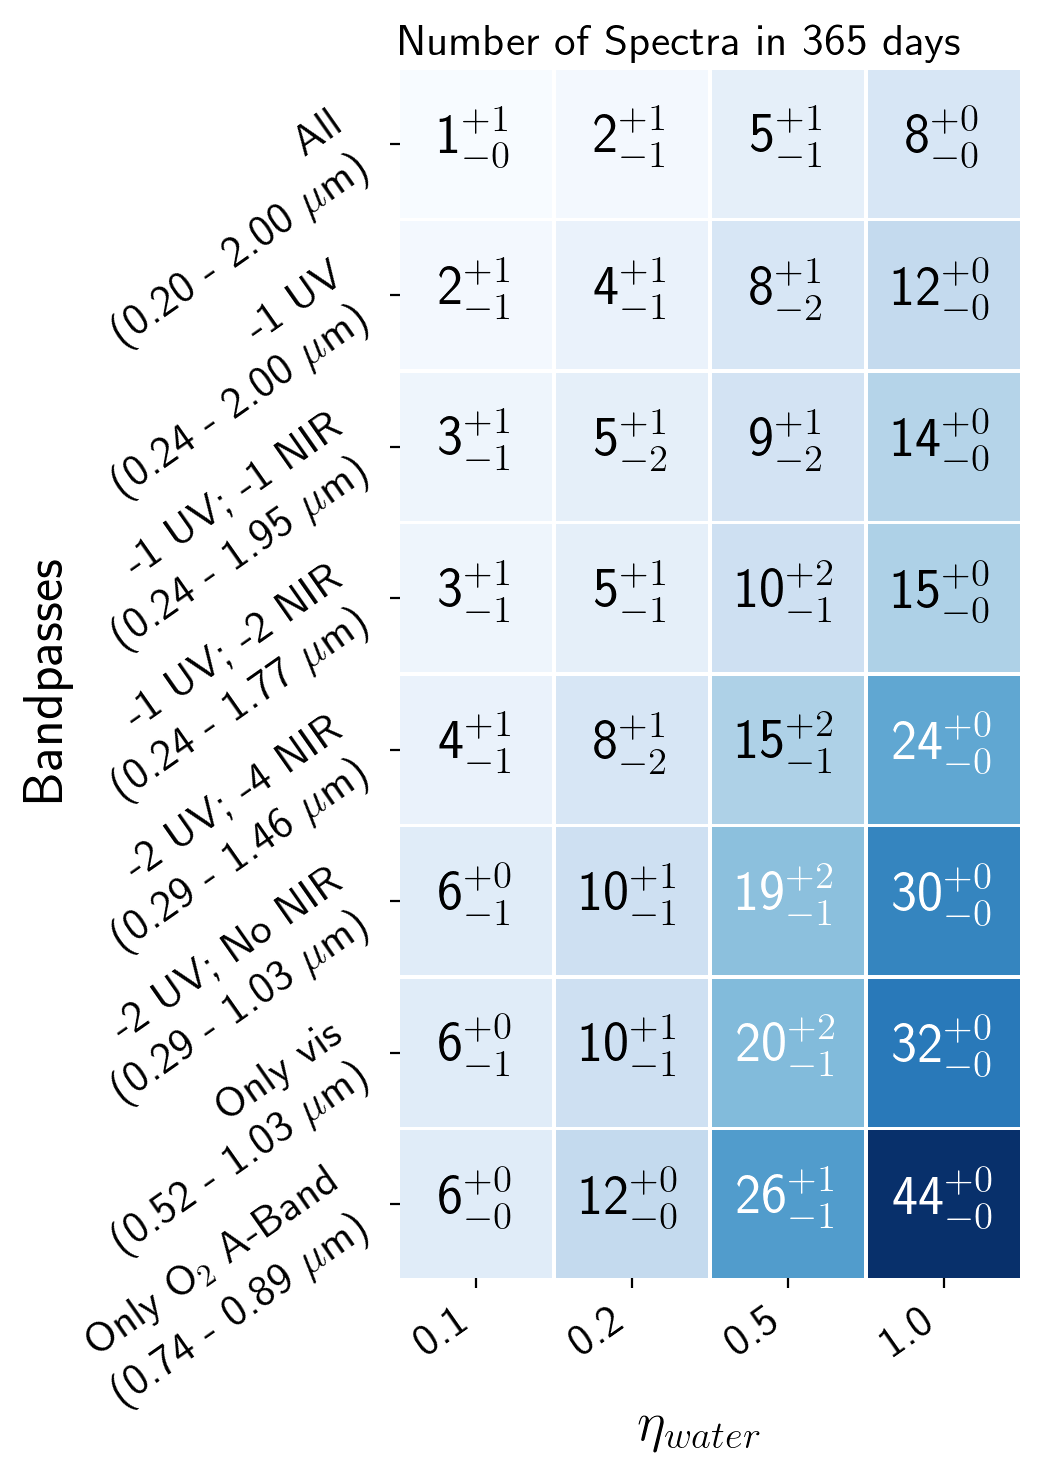

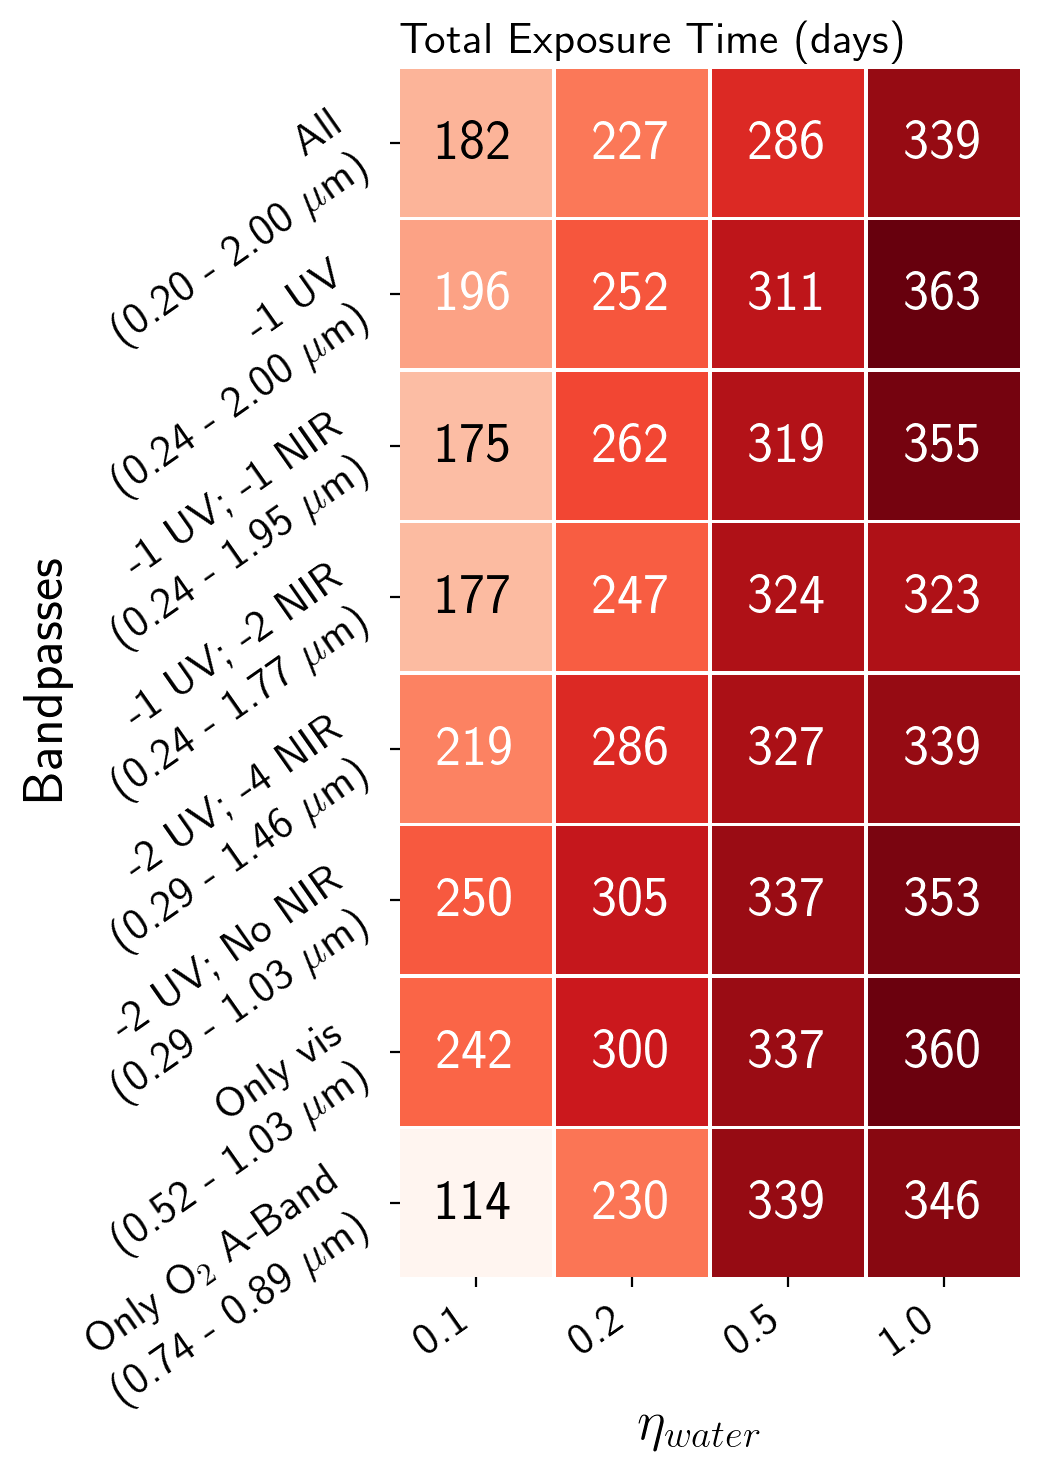

In [21]:
wantexp_days = 365.

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_name_strings, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %wantexp_days, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_name_strings, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

Text(0,1,'Total Exposure Time (days)')

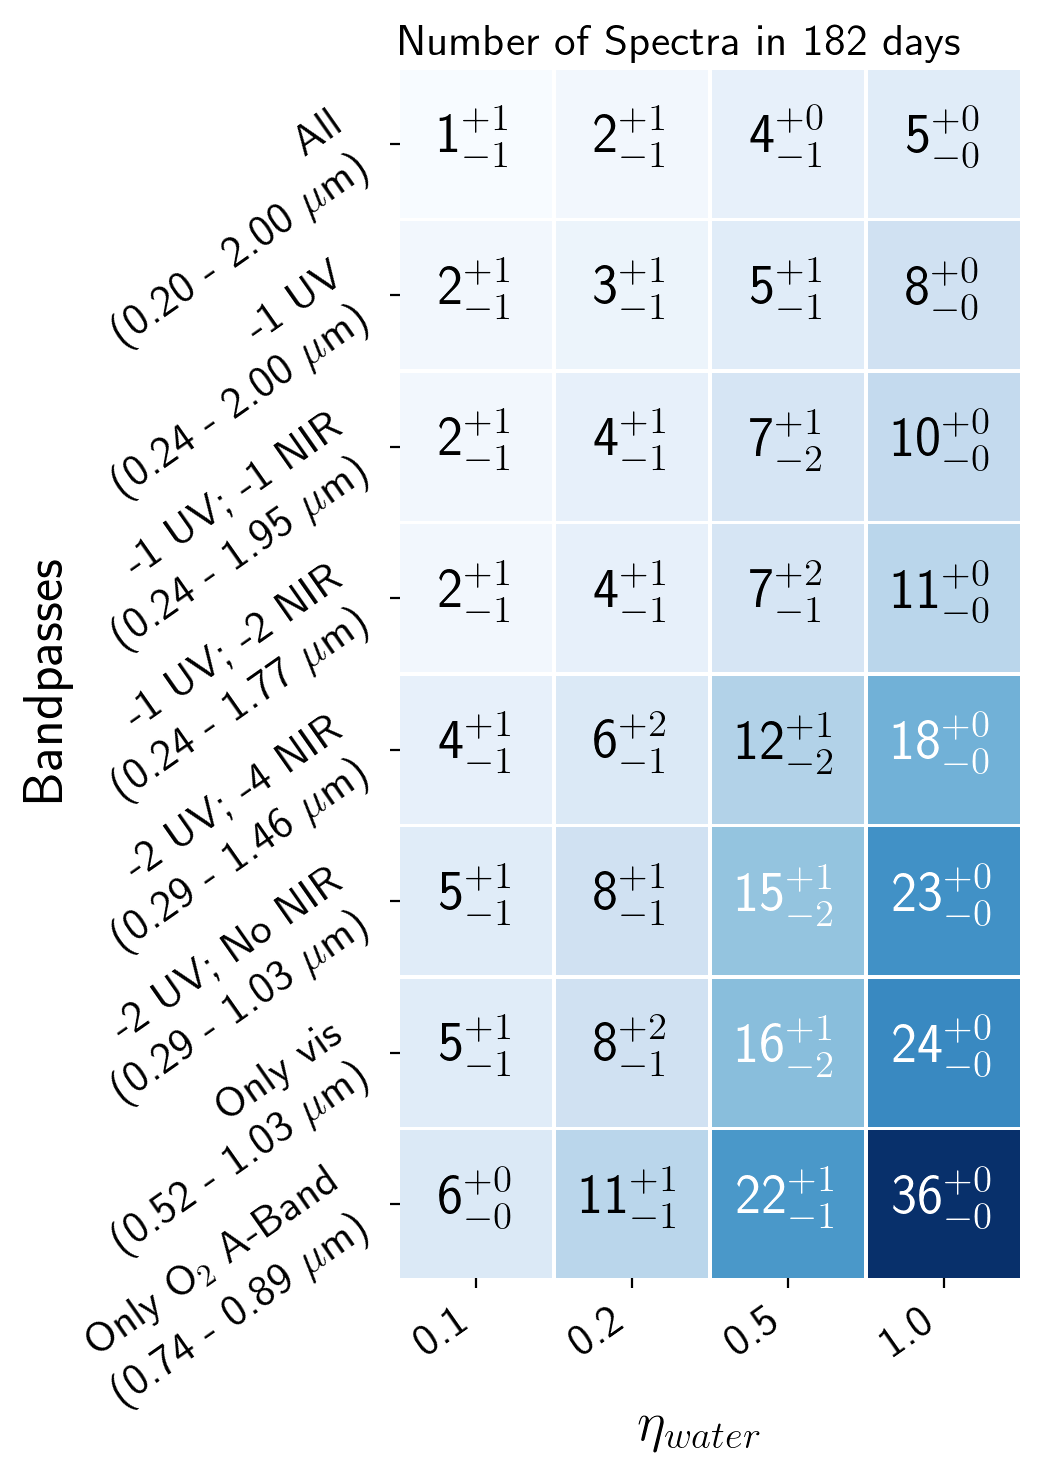

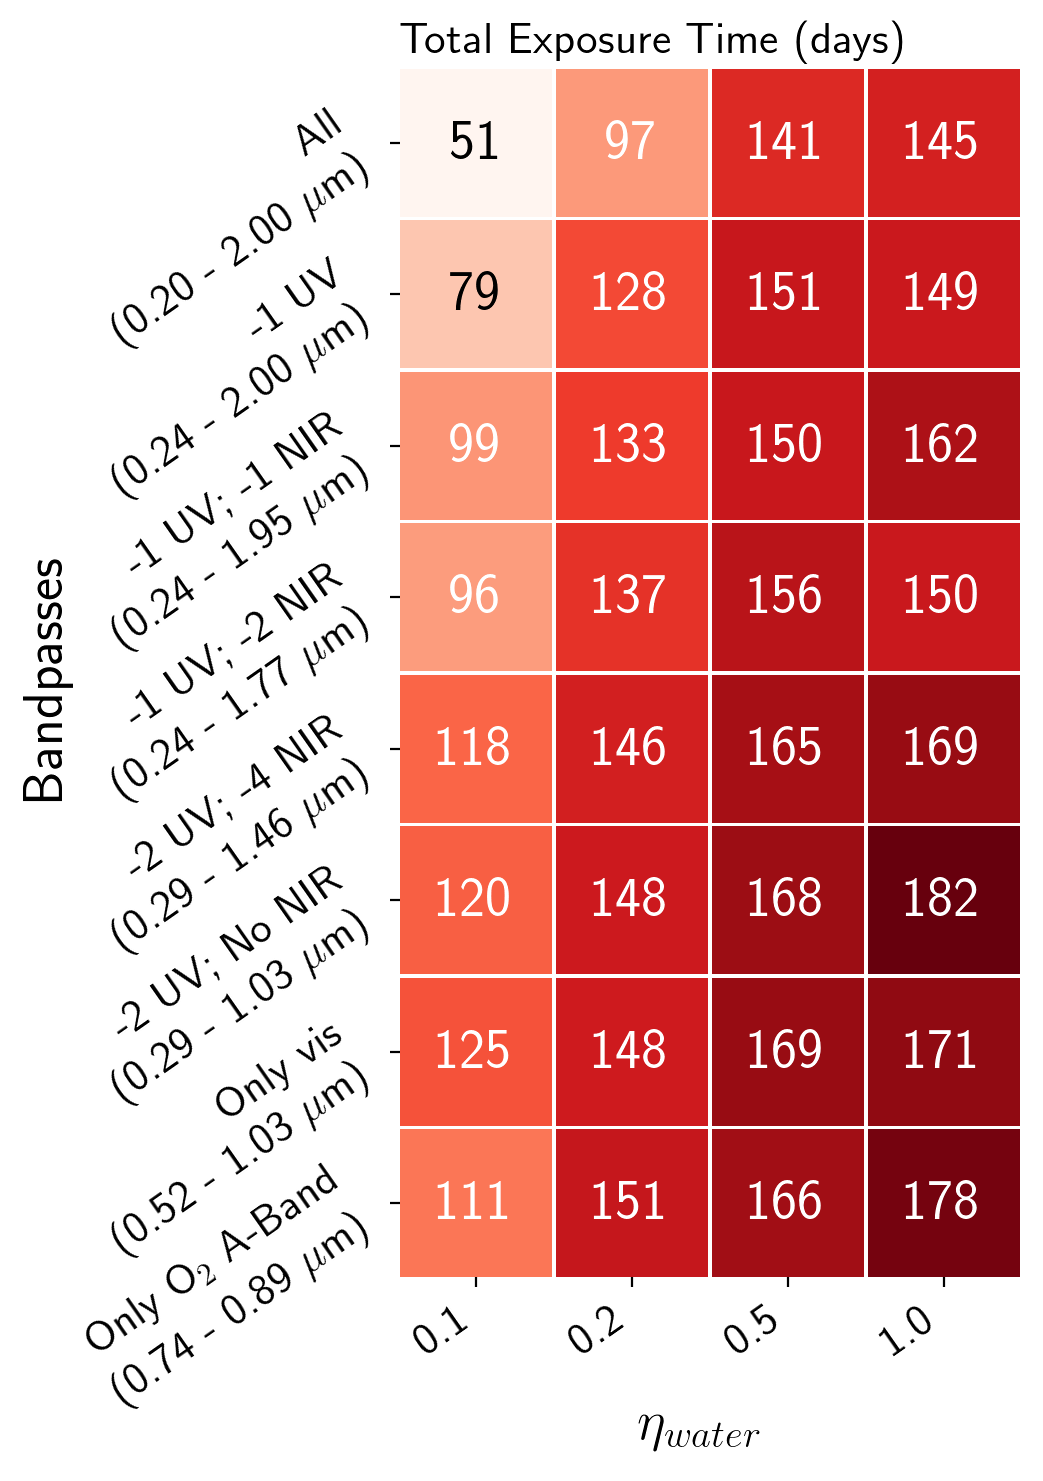

In [22]:
wantexp_days = 365. / 2

# Define eta range
Xdraw = 500
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(Ndraws), len(cases), 3))
t_scix = np.zeros((len(Ndraws), len(cases), 3))
t_ovrx = np.zeros((len(Ndraws), len(cases), 3))
countx = np.zeros((len(Ndraws), len(cases), 3))
for i in range(len(Ndraws)):
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m

# Make Table of results
fig, ax = ColorTable(etas, case_name_strings, countx[:,:,0], fmt = "%i", data_pm = (countx[:,:,1], countx[:,:,2]), labelfontsize=16, labelrotation=35, 
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of Spectra in %i days" %wantexp_days, ha = "left", fontsize = 16, loc = "left")

fig, ax = ColorTable(etas, case_name_strings, t_totx[:,:,0], fmt = "%i", labelfontsize=16, labelrotation=35, colormap = "Reds",
                     ylabel = "Bandpasses", xlabel = r"$\eta_{water}$", ylabel_spacing=-0.35, xlabel_spacing = 0.01, textsize = 16)
                     #data_pm = (t_totx[:,:,1], t_totx[:,:,2]))
ax[0,0].set_title("Total Exposure Time (days)", ha = "left", fontsize = 16, loc = "left")

/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


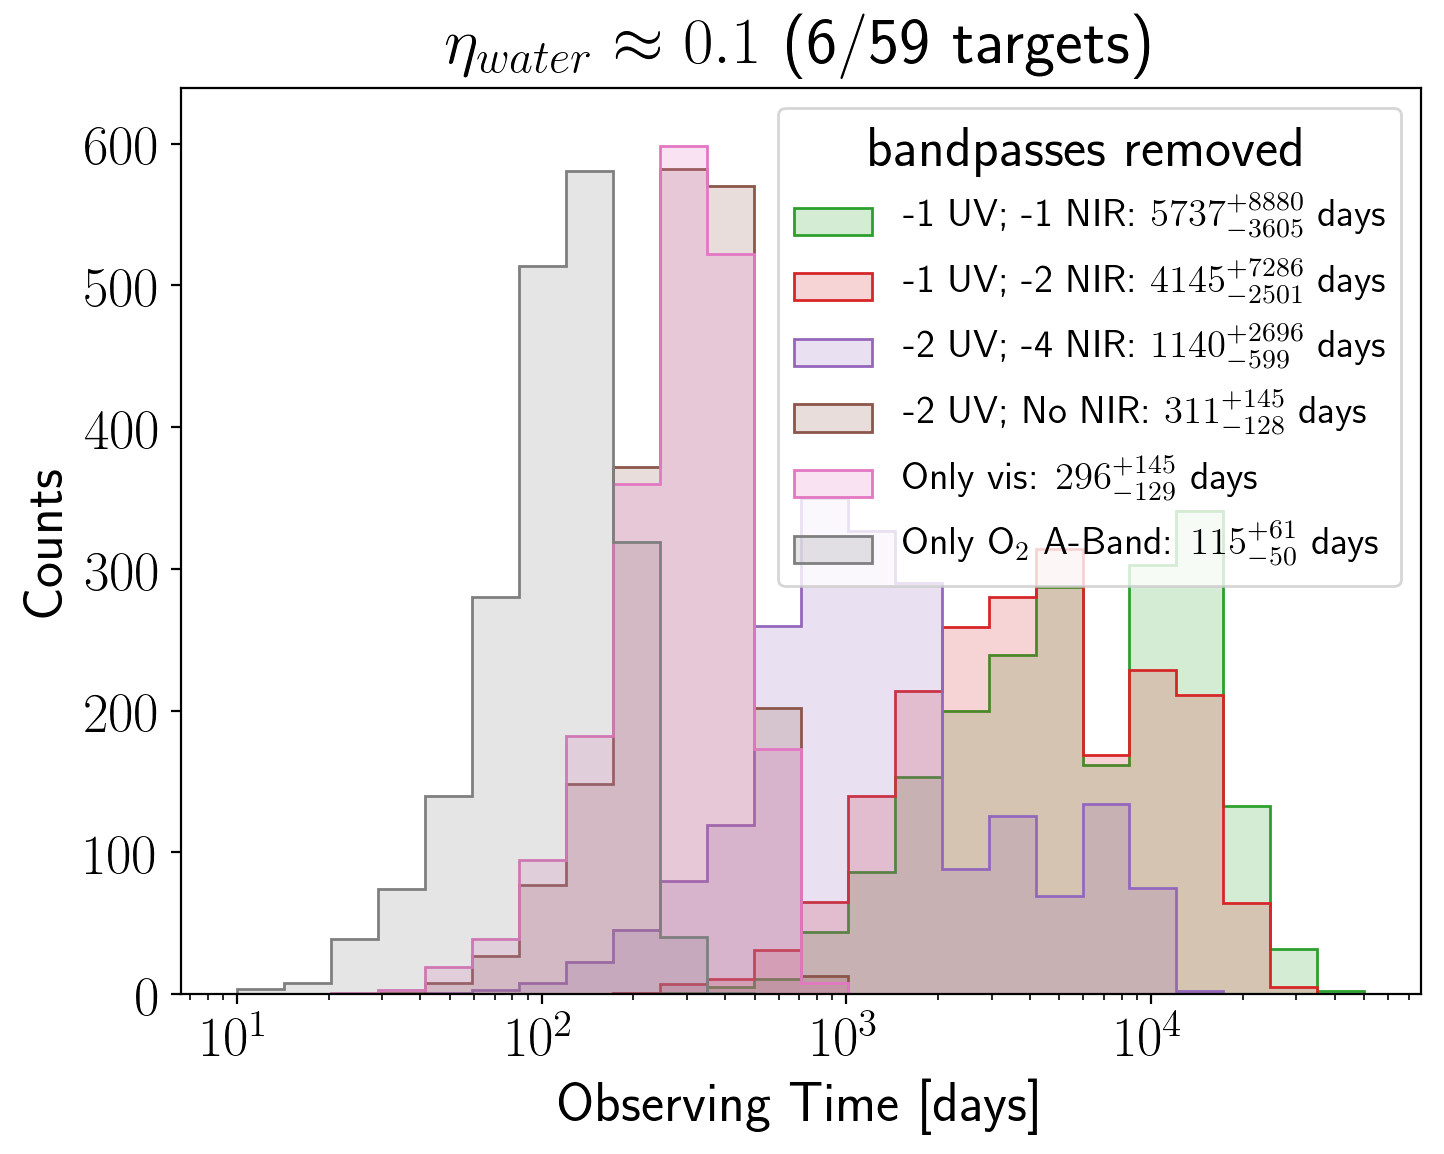

In [23]:
bins = 25
bins = np.logspace(1.0, 4.7, 25)
Xdraw = 2000
ieta = 0
Ndraw = int(np.round(etas[ieta]*drmx.NBIAS))

# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Observing Time [days]")
ax.set_ylabel("Counts")
ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(Ndraw)/float(drmx.NBIAS), Ndraw, drmx.NBIAS))

labels = []
handles = []

for j in range(len(cases))[2:]:
    t_tmp = np.zeros(Xdraw)
    t_sci = np.zeros(Xdraw)
    t_ovr = np.zeros(Xdraw)
    c_tmp = np.zeros(Xdraw)
    c_avg = np.zeros(Xdraw)
    for x in range(Xdraw):
        t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraw, 
                                                                                                       verbose = False, 
                                                                                                       iremove = cases[j], 
                                                                                                       wantexp_days=drmx.wantexp)
        t_tmp[x] = np.sum(t_tot_sort[:]) / 24.
        t_sci[x] = np.sum(t_sci_sort[:]) / 24.
        t_ovr[x] = np.sum(t_ovr_sort[:]) / 24.
        c_tmp[x] = count_in_texp
        c_avg[x] = np.mean(c_tot_sort)
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
    #t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
    #t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
    #t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
    #q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
    #countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
    
    label = case_names[j]
    t_totx = t_tmp
    color = "C%i" %j
    ctime_sum = t_totx
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
    result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
    h = ax.hist(ctime_sum, bins = bins, alpha = .2, color = color, normed=False);
    h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=False);
    handles.append((h[2][0], h2[2][0]))
    #ax.axvline(q_50, color = "w", ls = "dashed")
    #ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
    labels.append(label+": %s days" %result)
    
ax.set_ylim(top = 1.1*np.max(h[0]))
#ax.set_xlim(0.0, 2500)
ax.legend(handles, labels, fontsize = 14, title = "bandpasses removed")
ax.set_xscale("log")

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_removing_bands_expose_hist.pdf" %architecture, bbox_inches = "tight")

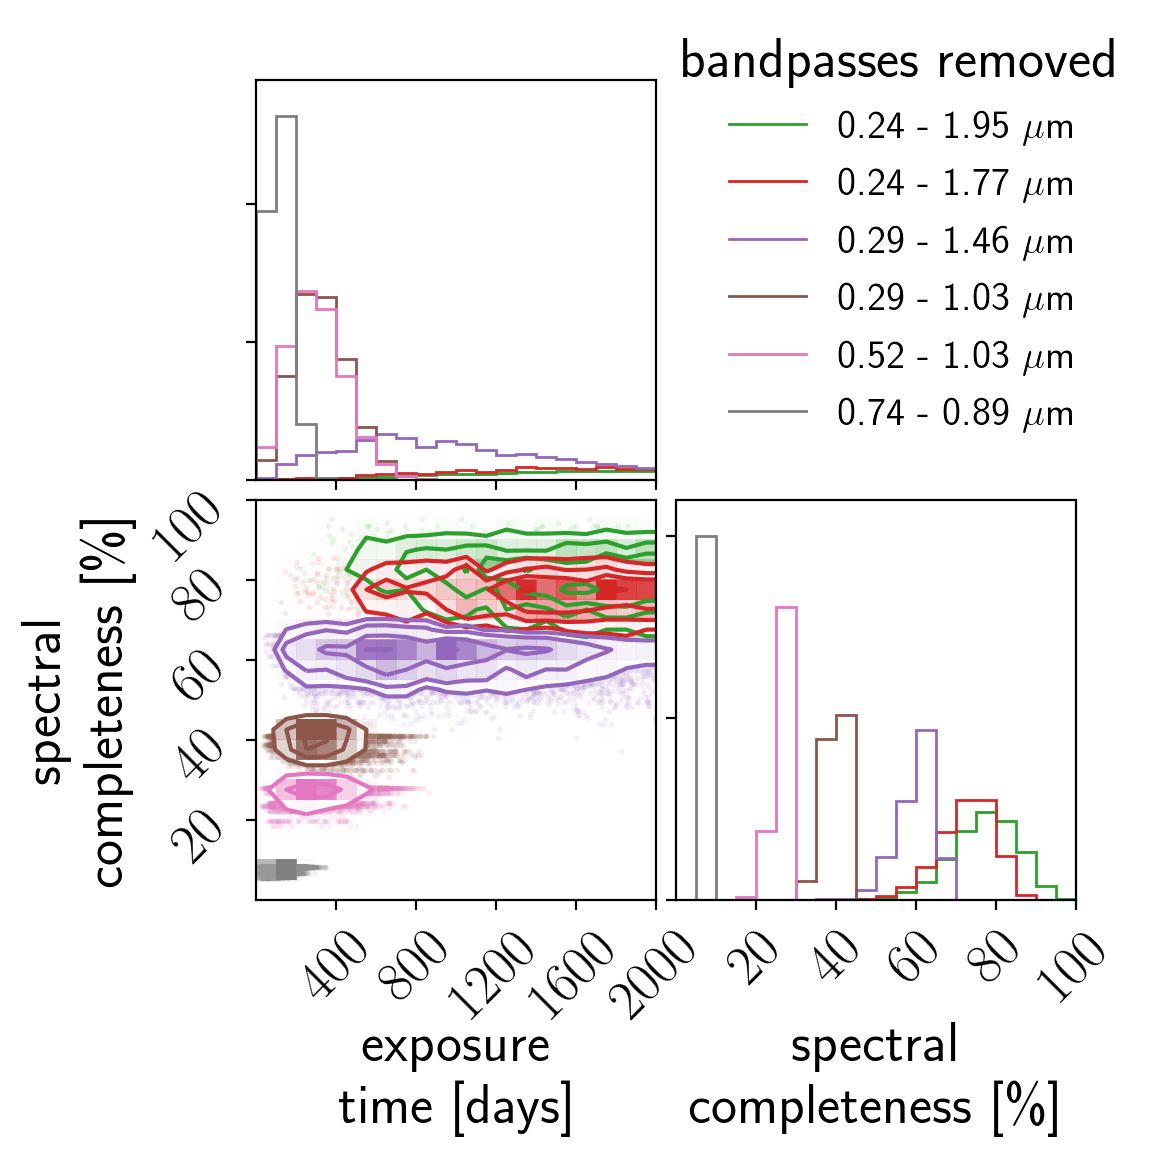

In [24]:
from corner import corner

icase = 4
Xdraw = 10000

count = 0
labels = []
handles = []

for j in range(len(cases))[2:]:
    
    t_tmp = np.zeros(Xdraw)
    t_sci = np.zeros(Xdraw)
    t_ovr = np.zeros(Xdraw)
    c_tmp = np.zeros(Xdraw)
    c_avg = np.zeros(Xdraw)
    for x in range(Xdraw):
        t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraw, 
                                                                                                       verbose = False, 
                                                                                                       iremove = cases[j], 
                                                                                                       wantexp_days=drmx.wantexp)
        t_tmp[x] = np.sum(t_tot_sort[:]) / 24.
        t_sci[x] = np.sum(t_sci_sort[:]) / 24.
        t_ovr[x] = np.sum(t_ovr_sort[:]) / 24.
        c_tmp[x] = count_in_texp
        c_avg[x] = np.mean(c_tot_sort)

    samples = np.array([t_tmp, 100*c_avg])
    axlabels = ["exposure \ntime [days]", "spectral \ncompleteness [\%]"]
    labels.append("%.2f - %.2f $\mu$m" %(case_ranges[j,0], case_ranges[j,1]))
    handles.append(mpl.lines.Line2D([0], [0], color="C%i" %j, lw=1))

    if count == 0:
        fig = corner(samples.T, labels=axlabels, range=[(0,2000), (0,100)], color="C%i" %j)
    else:
        corner(samples.T, labels=axlabels, range=[(0,2000), (0,100)], fig=fig, color="C%i" %j)
    
    count += 1

fig.legend(handles, labels, fontsize = 14, title = "bandpasses removed", loc = 1, framealpha = 0.0)
    

In [39]:
icase = 4

iremove = cases[icase]
iname = case_names[icase]

Xdraw = 200
Ndraws = np.arange(1,drmx.NBIAS)
wantdays = np.linspace(5, 365*2, 20)

zcube = np.zeros((len(Ndraws), len(wantdays), Xdraw))

np.random.seed(seed = None)

for i in range(len(Ndraws)):
    for j in range(len(wantdays)):
        for k in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraws[i], wantexp_days = wantdays[j], verbose = False, iremove = iremove) 
            zcube[i,j,k] = count_in_texp
            
zmean = np.mean(zcube, axis = 2)

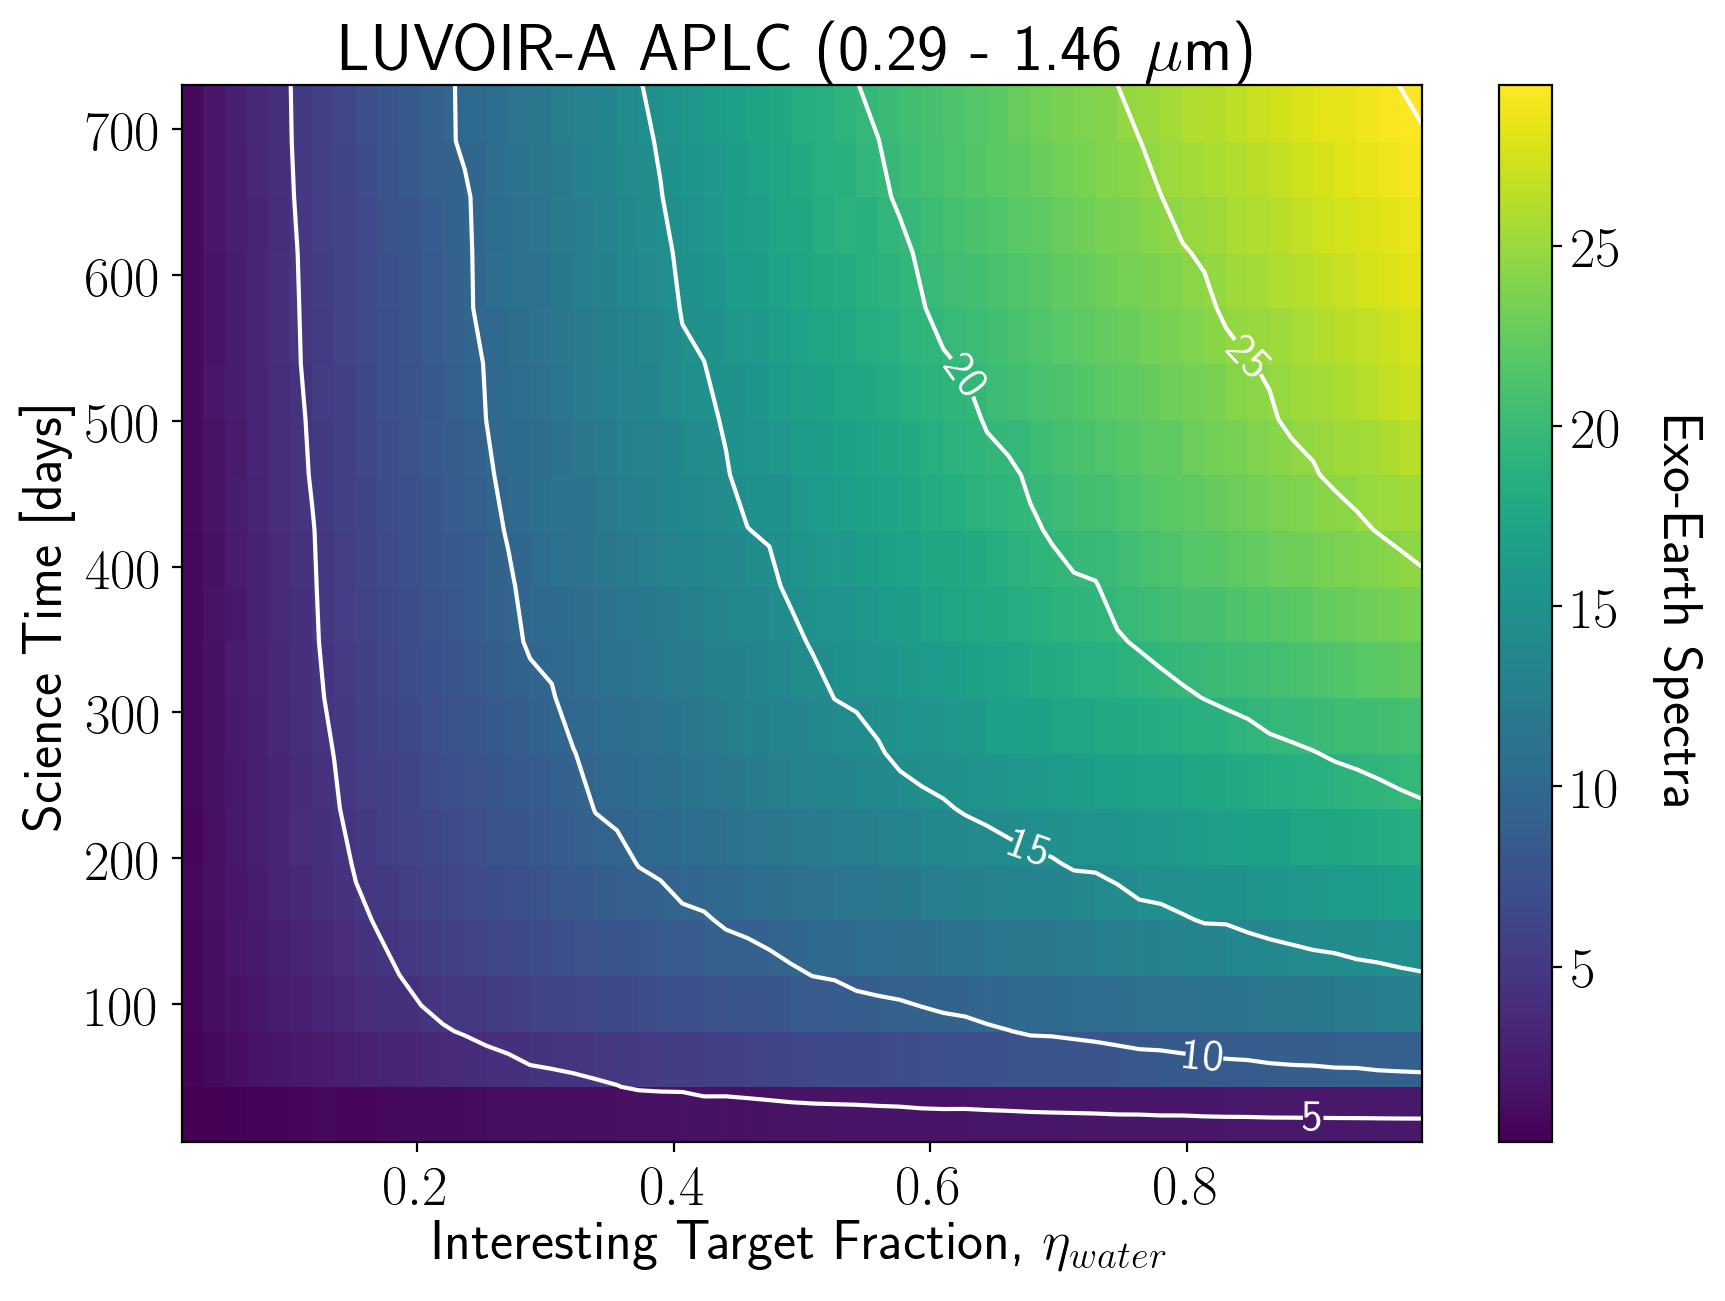

In [40]:
contour_intervals = 5.0
levels = list(np.arange(1, zmean.max() / contour_intervals) * contour_intervals)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title("%i total stars in sample" %drmx.NBIAS)
#ax.set_title("%i\%%; %s" %(100*drmx.bandwidth, iname))
ax.set_title("LUVOIR-A APLC (%s)" %(case_range_strings[icase]))
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Science Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zmean.T)
cln = ax.contour(Ndraws / float(drmx.NBIAS), wantdays, zmean.T, colors="w", levels = levels)
plt.clabel(cln, inline=1, fontsize=16, inline_spacing=1, fmt = "%i", rightside_up = True)
cbar = fig.colorbar(p)
cbar.set_label("Exo-Earth Spectra", rotation = 270, labelpad = 30)
p.set_rasterized(True)
#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_time_vs_eta_case4.pdf" %architecture, bbox_inches = "tight")

"""
zstd = np.std(zcube, axis = 2)

fig, ax = plt.subplots()
ax.set_title("%i total stars in sample" %drmx.NBIAS)
ax.set_xlabel("Interesting Target Fraction, $\eta_{water}$")
ax.set_ylabel("Observing Time [days]")
p = ax.pcolor(Ndraws / float(drmx.NBIAS), wantdays, zstd.T)
fig.colorbar(p, label = "Std Num of Complete Spectra")
""";

# Specific target example

In [27]:
zip(case_names, case_completeness)

[('All', 1.0),
 ('-1 UV', 0.9777777777777777),
 ('-1 UV; -1 NIR', 0.9492872777777778),
 ('-1 UV; -2 NIR', 0.8508672222222223),
 ('-2 UV; -4 NIR', 0.6533888888888889),
 ('-2 UV; No NIR', 0.4122222222222222),
 ('Only vis', 0.2861111111111111),
 ('Only O$_2$ A-Band', 0.0824)]

In [24]:
wantexp_days = 365. / 2
eta = 0.2
icase = 4

# Calc Ndraw from eta_water
Ndraw = int(np.round(eta*drmx.NBIAS))

# Indices of bandpasses to use
ind = np.delete(np.arange(len(drmx.bandpasses)), cases[icase])

# Set RNG seed for reproducible randomness
np.random.seed(seed = 1)

print("Case: %s (%.2f - %.2f µm)" %(case_names[icase], case_ranges[icase,0], case_ranges[icase,1]))
t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = Ndraw, 
                                                                                               verbose = True, 
                                                                                               iremove = cases[icase], 
                                                                                               wantexp_days=wantexp_days)

# Set RNG seed back to None
np.random.seed(seed = None)

Case: -2 UV; -4 NIR (0.29 - 1.46 µm)
HIP86736 - F6/F7V - 17.12pc
    - 66.1% Complete Spectrum : 121.35 days
    - UV Spectrum : 3.19 days
    - Optical Spectrum : 34.05 days
    - NIR Spectrum : 121.35 days
    - Overhead 12.48 days
HIP1599 - F9V - 8.53pc
    - 66.1% Complete Spectrum : 4.16 days
    - UV Spectrum : 0.65 days
    - Optical Spectrum : 3.40 days
    - NIR Spectrum : 4.16 days
    - Overhead 0.76 days
HIP59750 - F5V - 22.35pc
    - 66.1% Complete Spectrum : 435.25 days
    - UV Spectrum : 7.22 days
    - Optical Spectrum : 106.62 days
    - NIR Spectrum : 435.25 days
    - Overhead 43.87 days
HIP80337 - G3/G5V - 12.91pc
    - 66.1% Complete Spectrum : 68.54 days
    - UV Spectrum : 2.32 days
    - Optical Spectrum : 23.35 days
    - NIR Spectrum : 68.54 days
    - Overhead 7.20 days
HIP64394 - G0V - 9.18pc
    - 66.1% Complete Spectrum : 5.89 days
    - UV Spectrum : 0.76 days
    - Optical Spectrum : 4.59 days
    - NIR Spectrum : 5.89 days
    - Overhead 0.93 days
HIP5

# Explore Time-Variability

In [25]:
import luvoir_time_variability

/Users/Jake/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/Users/Jake/anaconda2/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/Users/Jake/anaconda2/lib/python2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/Users/Jake/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/Users/Jake/anaconda2/lib/python2.7/site-packages/sklearn/metri

In [78]:
#import imp
#imp.reload(luvoir_time_variability)

<module 'luvoir_time_variability' from '../scripts/luvoir_time_variability.py'>

In [168]:
# For now, select HIP from above print statements
hip_choice = 63721  # No (Optical Spectrum : 2.01 days)
hip_choice = 1599   # No (Optical Spectrum : 3.40 days)
hip_choice = 64394  # Yes (Optical Spectrum : 4.59 days)
hip_choice = 76074  # No (Optical Spectrum : 1.23 days)
hip_choice = 42438  # Yes(Optical Spectrum : 17.91 days)
hip_choice = 80337  # No (Optical Spectrum : 23.35 days)
hip_choice = 32439  # No/maybe (Optical Spectrum : 28.56 days)
hip_choice = 86736  # No (Optical Spectrum : 34.05 days)
icase = 6 

# Get index of star that matches HIP number
istar = np.where(drmx.STARS["hip"] == hip_choice)[0][0]

# Get exptimes
texpbp = drmx.tpbpcs_rect[istar,:]

# Set system parameters for this star
drmx.prep_ith_star(istar)

# Set bandpass case
case = cases[icase]

print(drmx.cn.planet)
print(drmx.cn.star)
print(case_names[icase])
print("------------------")

for i, ibp in enumerate(iuse_bps[icase]):
    print("%s : %.0f hours" %(drmx.bp_names[ibp], np.ceil(texpbp[ibp])))

No exact match found
Using F7V for F6/F7V
Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 17.1245
- Number of exzodis (zodis) : 2.07662
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 1.5678878125232225
- Phase angle (deg) : 90.00000250447816
- Lambertian phase function : 0.318309864328096
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0
Star: 
-----
- Effective Temperature (K) : 6420.0
- Radius (Solar Radii) : 1.35
Only vis
------------------
vis 1 : 129 hours
vis 2 : 157 hours
vis 3 : 309 hours
vis 4 : 224 hours


In [134]:
luvoir_time_variability.observe_earth_time_variability?

Signature: luvoir_time_variability.observe_earth_time_variability(drmx, Ntexp, istart, ibp, which_earth=u'True_Earth', which_phase=90.0)
Docstring:
Make a mock observation of Earth's spectrum as a function of time that is consistent
with the LUVOIR exoEarth DRM.

Parameters
----------
drmx : HEC_DRM
    DRM object
Ntexp : int
    Number of consecutive hours to exposure
istart : int
    Starting hour index
ibp : int
    Bandpass Index
which_earth : str
    Select from multiple VPL Earth Models:
        1. "True_Earth"
        2. "Cloudless"
        3. "Cirrus"
        4. "Land_Switch"
which_phase : int or float
    Select the planet phase:
        1. 45 (gibbous)
        2. 90 (quadrature)
        3. 135 (crescent)

Returns
-------
spectrum : dict
    "lam" : wavelength grid at native resolution
    "obs" : observations at native resolution
    "err" : errors at native resolution
    "t0" : observation time stamps
    "dt0" : observation time durations
lightcurve :
    "time" : time gri

In [169]:
istart = 0

spectra = []
lightcurves = []
native2D = []

# Loop over bandpasses that are to be used
for i, ibp in enumerate(iuse_bps[icase]):

    # If exposure time in the BP is finite
    if np.isfinite(texpbp[ibp]):
        # Set the number of consecutive 1-hour exposures to the BP exposure time 
        # rounded UP to the nearest hour
        Ntexp = int(np.ceil(texpbp[ibp]))
    else:
        # Otherwise set to NaN
        Ntexp = np.nan
        
    # If Ntexp is finite
    if (ibp not in case) and (np.isfinite(Ntexp)):
        
        # Set best coronagraph mask for this BP & star
        arch = "A (APLC%i)" %(best_masks[istar,ibp] + 1)
        chan = spectroscopy.CHANNELS[drmx.bp_chan[ibp]]
        drmx.architecture = arch
        
        # Create the mock dataset
        spec, lc, twod = luvoir_time_variability.observe_earth_time_variability(drmx, Ntexp, istart, ibp)
        
        # Append output to BP lists
        spectra.append(spec)
        lightcurves.append(lc)
        native2D.append(twod)
        
        # Add exposure time to start time so next bandpass starts 
        # where this one left off
        istart += Ntexp

HDF5 file opened
HDF5 file opened
HDF5 file opened
HDF5 file opened


In [170]:
# Coerce "data" into LombScargleMultiband format
t = np.hstack([lightcurves[i]["time"] for i in range(len(lightcurves))])
y = np.hstack([lightcurves[i]["obs"] for i in range(len(lightcurves))])
dy = np.hstack([lightcurves[i]["err"] for i in range(len(lightcurves))])
filts = np.hstack([lightcurves[i]["bp_names"] for i in range(len(lightcurves))])

In [200]:
import gatspy 

Pmin = 10.0
Pmax = 100.0

# Using the LombScargleMultiband
lsmodel = gatspy.periodic.LombScargleMultiband(fit_period=True)

# Specify valid period range to search
lsmodel.optimizer.period_range=(Pmin, Pmax)

# Fit periodogram
lsmodel.fit(t, y, dy, filts)

# Get best period
best_period = lsmodel.best_period
print("Best Period: %.2f hours" %best_period)

Finding optimal frequency:
 - Estimated peak width = 0.00768
 - Using 5 steps per peak; omega_step = 0.00154
 - User-specified period range:  10 to 1e+02
 - Computing periods at 370 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Best Period: 10.67 hours


In [201]:
# Shuffle data
t_shuffle, y_shuffle, dy_shuffle, filts_shuffle = [],[],[],[]
for i in range(len(lightcurves)):
    
    ix = np.arange(len(lightcurves[i]["time"]))
    np.random.shuffle(ix)
    
    t_shuffle.append(lightcurves[i]["time"])
    y_shuffle.append(lightcurves[i]["obs"][ix])
    dy_shuffle.append(lightcurves[i]["err"][ix])
    filts_shuffle.append(lightcurves[i]["bp_names"])

t_shuffle = np.hstack(t_shuffle)
y_shuffle = np.hstack(y_shuffle)
dy_shuffle = np.hstack(dy_shuffle)
filts_shuffle = np.hstack(filts_shuffle)

# Using the LombScargleMultiband
lsmodel_shuffle = gatspy.periodic.LombScargleMultiband(fit_period=True)

# Specify valid period range to search
lsmodel_shuffle.optimizer.period_range=(12.0, 100.0)

# Fit periodogram
lsmodel_shuffle.fit(t_shuffle, y_shuffle, dy_shuffle, filts_shuffle)

# Get best period
best_period_shuffle = lsmodel_shuffle.best_period
print("Best Period: %.2f hours" %best_period_shuffle)

Finding optimal frequency:
 - Estimated peak width = 0.00768
 - Using 5 steps per peak; omega_step = 0.00154
 - User-specified period range:  12 to 1e+02
 - Computing periods at 301 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Best Period: 14.97 hours


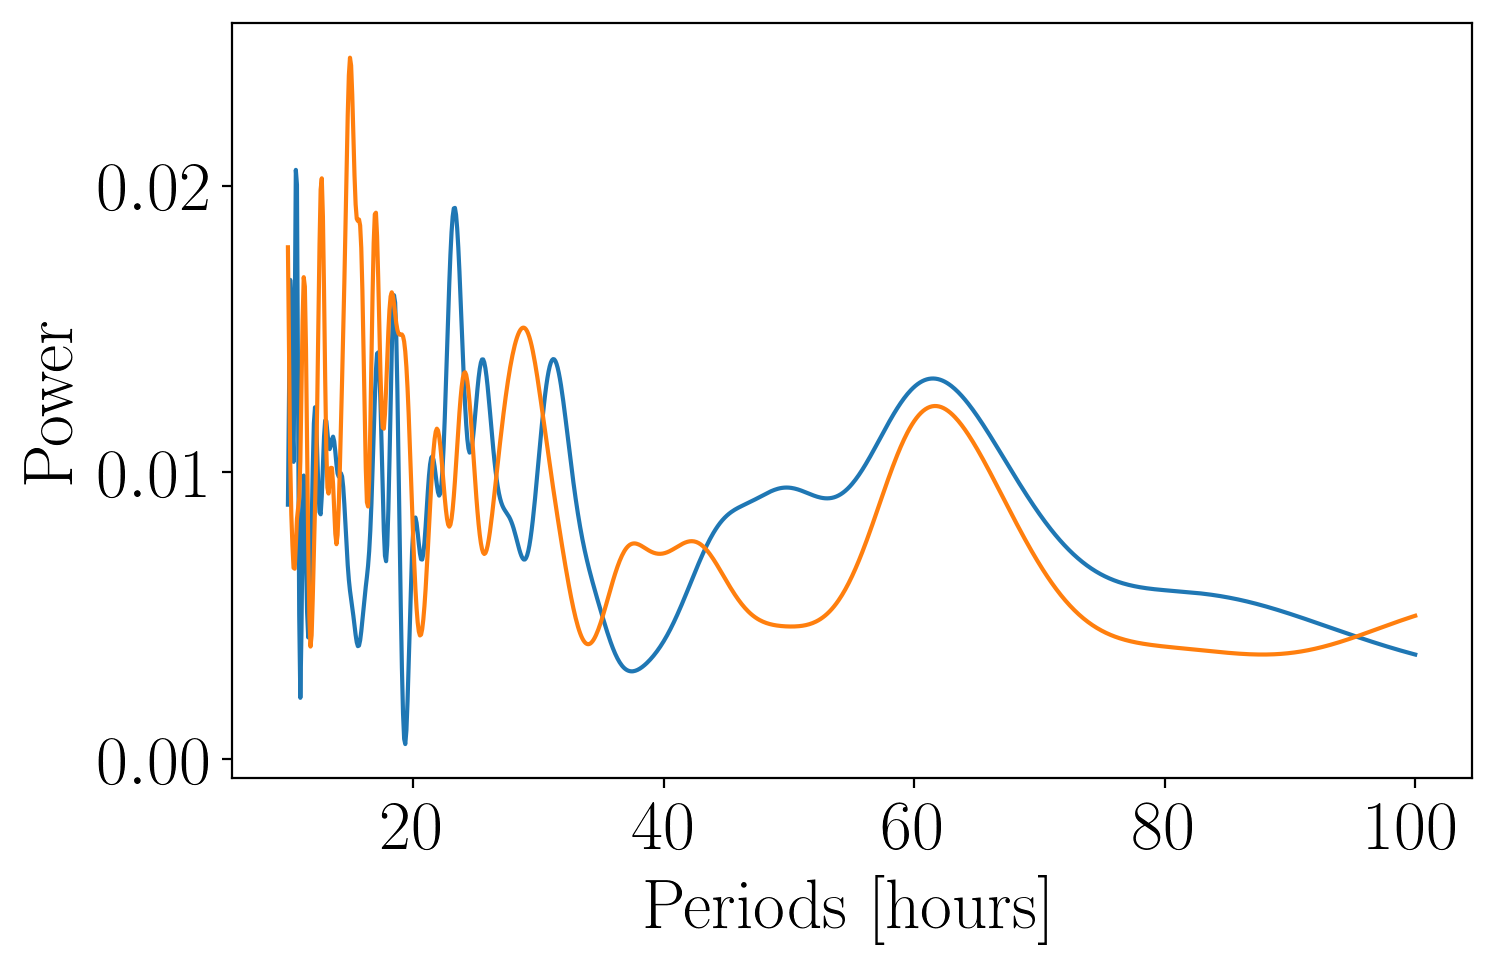

In [205]:
periods = np.linspace(Pmin, Pmax, 1000)

P = lsmodel.periodogram(periods)
P2 = lsmodel_shuffle.periodogram(periods)

fig, ax = plt.subplots()
ax.set_xlabel("Periods [hours]")
ax.set_ylabel("Power")
ax.plot(periods, P, label = "true")
ax.plot(periods, P2, label = "shuffled")

Text(0.1,0.5,'Relative Albedo')

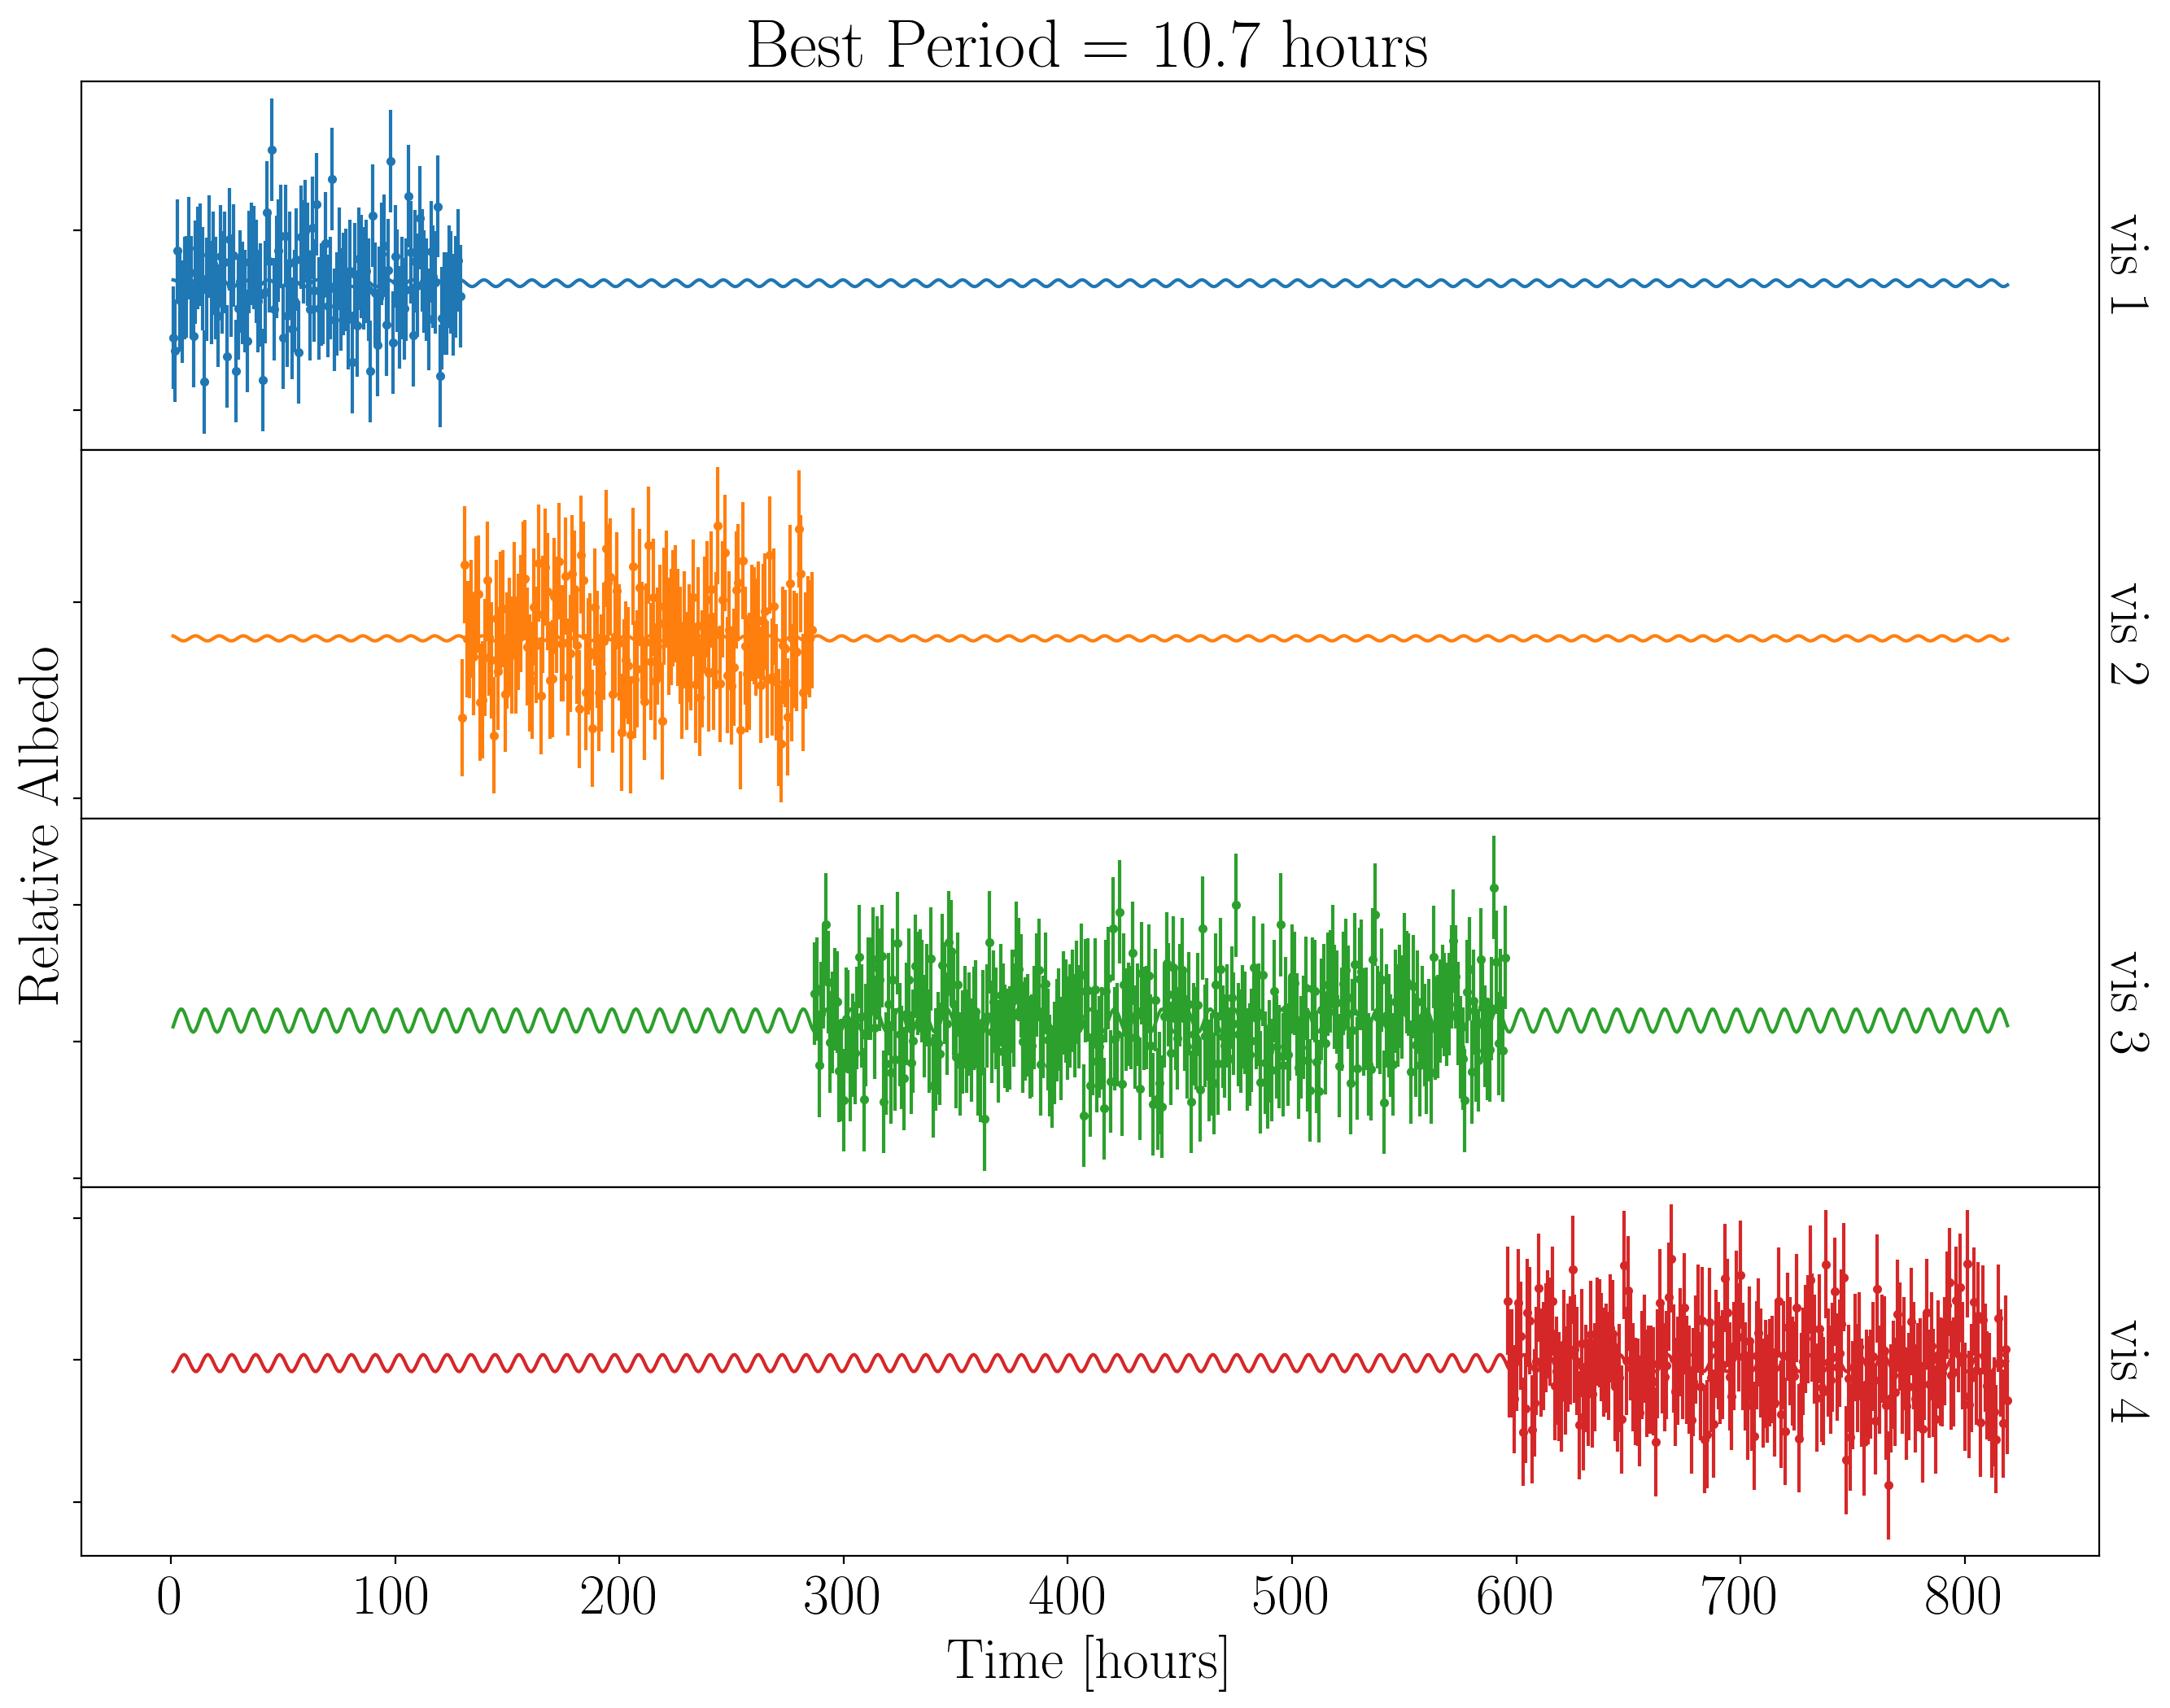

In [203]:
fig, ax = plt.subplots(len(lightcurves), 1, figsize = (16,3*len(lightcurves)), gridspec_kw={"hspace" : 0})
#ax.set_xlabel("Time [hours]")
#ax.set_ylabel("Albedo")

ax[0].set_title("Best Period = %.1f hours" %best_period)

tfit = np.linspace(np.min(t), np.max(t), 1000)

for i in range(len(lightcurves)):

    yfit = lsmodel.predict(tfit, filts=lightcurves[i]["bp_names"][0])
    
    ax[i].errorbar(lightcurves[i]["time"], lightcurves[i]["obs"], yerr=lightcurves[i]["err"], fmt=".", color = "C%i" %(i%9))
    ax[i].plot(tfit, yfit, color = "C%i" %(i%9))
    ax[i].text(1.0, 0.5, lightcurves[i]["bp_names"][0], ha = "left", va = "center", transform=ax[i].transAxes, rotation = 270)
    ax[i].set_yticklabels([])

ax[i].set_xlabel("Time [hours]")
ylabel_spacing = 0.1
fig.text(ylabel_spacing, 0.5, "Relative Albedo", ha = "left", va = "center",
            fontsize=mpl.rcParams['font.size'], zorder=10, rotation = 90,
            bbox=dict(boxstyle="square", fc="none", ec="none"))

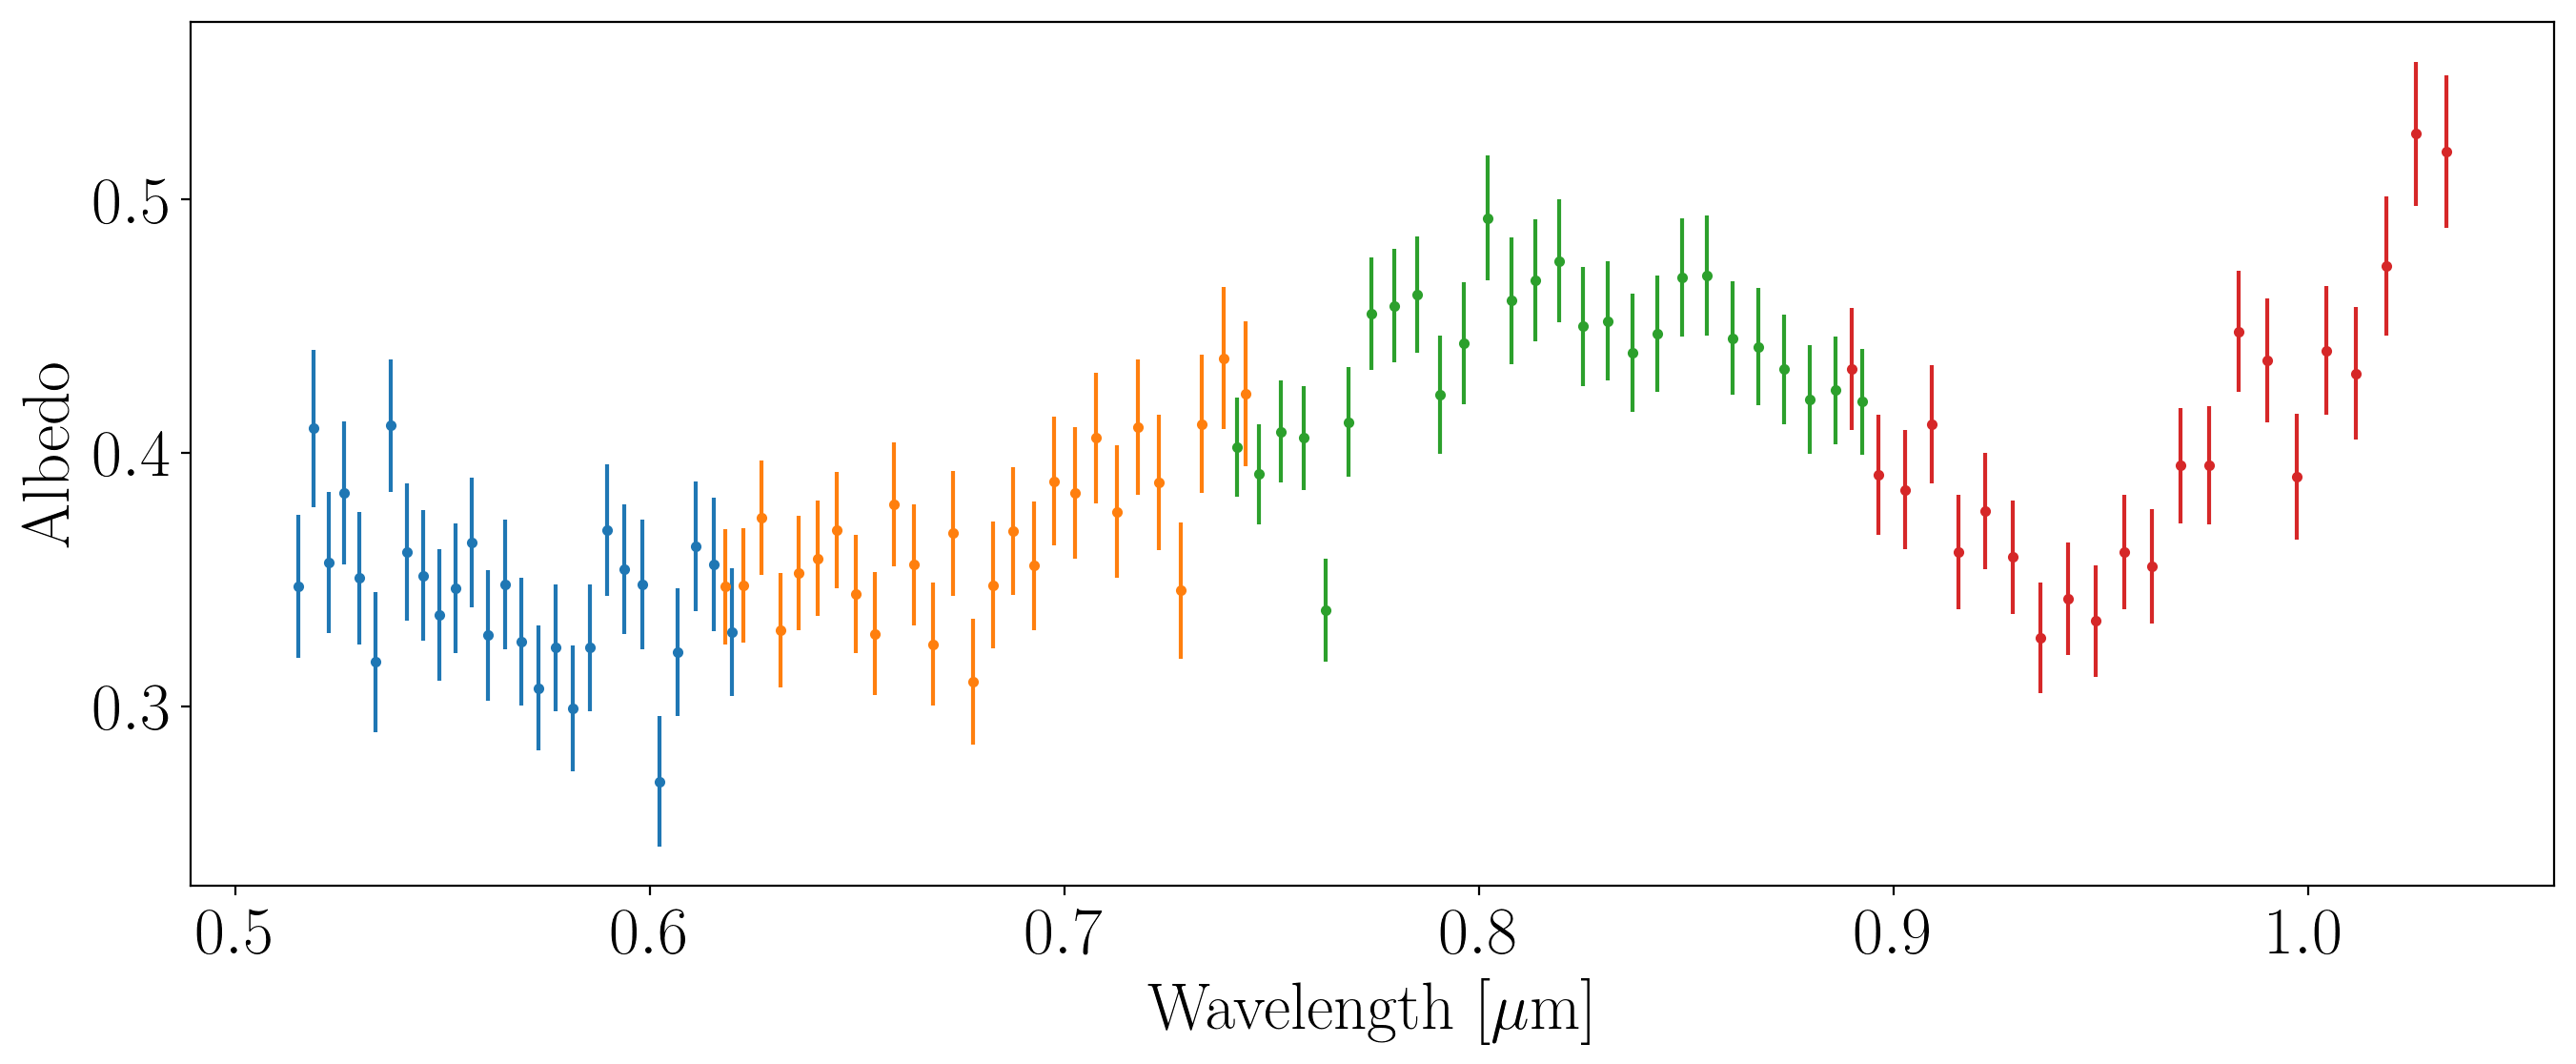

In [204]:
fig, ax = plt.subplots(figsize = (16,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Albedo")

for i in range(len(spectra)):
    ax.errorbar(spectra[i]["lam"], spectra[i]["obs"], yerr=spectra[i]["err"], fmt = ".")